In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

## test

In [4]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_90_v2.csv', index_col=0)
df

Principal Approve Amount  Principal Amount  \
0                     199000.0         199000.00   
1                      60000.0          58822.04   
2                      36000.0          35904.37   
3                      30000.0          28813.69   
4                     200000.0         200000.00   
...                        ...               ...   
4024                   14000.0          14000.00   
4025                   45000.0          45000.00   
4027                  144000.0         144000.00   
4029                   39000.0          39000.00   
4030                  300000.0         300000.00   

      Repayment Tenor Month Number Gender Occupation Description  \
0                               60      F          STREET VENDOR   
1                               36      M                  อื่นๆ   
2                               24      F          พนักงานบริษัท   
3                               24      F                เกษตรกร   
4                               36      M          พนักงานบริษัท   
...                            ...    ...                    ...   
4024                            12      F          STREET VENDOR   
4025                            18      F          พนักงานบริษัท   
4027                            60      M              ข้าราชการ   
4029                            36      F          พนักงานบริษัท   
4030                            60      F                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                         20000.0                   PU        NISSAN   
1                         14000.0                  CAR        TOYOTA   
2                         15000.0                   MC         HONDA   
3                         35000.0                   MC         HONDA   
4                         40000.0                   PU         ISUZU   
...                           ...                  ...           ...   
4024                      15000.0                   MC        YAMAHA   
4025                      40000.0                   MC         HONDA   
4027                      36000.0                  CAR        TOYOTA   
4029                      15000.0                   MC         HONDA   
4030                      20000.0                   PU        NISSAN   

        Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0     FRONTIER NAVARA                  2012                AD   
1       COROLLA ALTIS                  2002                AJ   
2          CLICK 150I                  2019                BH   
3             PCX 150                  2020                ED   
4               D-MAX                  2013                BU   
...               ...                   ...               ...   
4024     FINO (MLEKE)                  2009                AH   
4025          PCX 150                  2017                CQ   
4027             VIOS                  2010                DX   
4029       DREAM 110I                  2017                CO   
4030           NAVARA                  2019                DQ   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
0                283500                      S1           14/11/2022   
1                111000                      S1             6/9/2022   
2                 48500                      S1           30/12/2022   
3                 76500                      S1           12/11/2022   
4                414500                      S1           29/12/2022   
...                 ...                     ...                  ...   
4024              23000                      S3           24/12/2022   
4025              61500                      S3           27/12/2022   
4027             222000                      S3           29/12/2022   
4029              53000                      S3           29/12/2022   
4030             484500                      S3           29/12/2022   

     Final CAR Code Previous Month  DPD  age  Vehicle

In [5]:
df = df.rename(columns=lambda x: x.strip().replace(' ', '_'))
df.head()

Principal_Approve_Amount  Principal_Amount  Repayment_Tenor_Month_Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

  Gender Occupation_Description  Total_Income_Amount_(Month)  \
0      F          STREET VENDOR                      20000.0   
1      M                  อื่นๆ                      14000.0   
2      F          พนักงานบริษัท                      15000.0   
3      F                เกษตรกร                      35000.0   
4      M          พนักงานบริษัท                      40000.0   

  Collateral_Type_Code Vehicle_Brand    Vehicle_Model  Vehicle_Release_Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   
2                   MC         HONDA       CLICK 150I                  2019   
3                   MC         HONDA          PCX 150                  2020   
4                   PU         ISUZU            D-MAX                  2013   

  Vehicle_Sub_Model  Evaluation_Amount System_CAR_Code_(Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   
2                BH              48500                      S1   
3                ED              76500                      S1   
4                BU             414500                      S1   

  System_CAR_Code_Date Final_CAR_Code_Previous_Month DPD  age  Vehicle_Age  \
0           14/11/2022                            S1  PL   44           11   
1             6/9/2022                            S1  PL   53           21   
2           30/12/2022                            S2  PL   32            4   
3           12/11/2022                            S1  PL   37            3   
4           29/12/2022                            S1  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [6]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:['F' 'M']

Occupation_Description:['STREET VENDOR' 'อื่นๆ' 'พนักงานบริษัท' 'เกษตรกร' 'ข้าราชการ'
 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'อาจารย์' 'พนักงานรัฐวิสาหกิจ']

Collateral_Type_Code:['PU' 'CAR' 'MC' 'VAN' 'TRUCK']

Vehicle_Brand:['NISSAN' 'TOYOTA' 'HONDA' 'ISUZU' 'YAMAHA' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KAWASAKI' 'FORD' 'RYUKA' 'VESPA' 'GPX' 'HINO' 'MG' 'CHEVROLET' 'TATA'
 'KIA' 'STALLION' 'HYUNDAI' 'PROTON' 'LAMBRETTA' 'BENELLI']

Vehicle_Model:['FRONTIER NAVARA' 'COROLLA ALTIS' 'CLICK 150I' 'PCX 150' 'D-MAX'
 'HILUX TIGER' 'SCOOPY I' 'WAVE 110 I' 'MARCH' 'TTX 115' 'WAVE X'
 'DREAM 110' 'GRAND FILANO 125' 'HILUX VIGO' 'ALMERA' 'VIOS' 'TRITON'
 'CITY' 'MIO 115' 'MSX 125' 'M-SLAZ 150' 'CIVIC' 'CLICK 125I' 'CAMRY'
 'MT 15' 'CB 150' 'SUPER CUB 110' 'WAVE 125 I' 'FINO (MLEKE)' 'XTRAIL'
 'DREAM 110I' 'COROLLA' 'WAVE 100' 'BT-50' 'PCX 160' 'JAZZ' 'CR-V'
 'SMASH 115' 'CIAZ' 'QBIX 125 S' 'CLICK 110' 'AEROX 155' 'ER6N 650'
 'NP300' 'WAVE 125' 'WAVE 125 X' 'MIRAGE' 'MIO 125' 'SWIFT' 

In [7]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [8]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [9]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model','System_CAR_Code_(Daily)','Final_CAR_Code_Previous_Month']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [10]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:[0 1]

Occupation_Description:[0 6 3 7 1 8 2 5 4]

Collateral_Type_Code:[2 0 1 4 3]

Vehicle_Brand:[14 20  5  7 22 13 11 18  8  2 16 21  3  4 12  1 19  9 17  6 15 10  0]

Vehicle_Model:[ 78  39  34 133  49  89 154 190 108 185 196  54  81  90   6 188 184  28
 110 117 107  29  33  14 118  18 175 193  71 201  55  38 189  12 135  93
  42 161  27 143  31   4  60 129 192 194 114 112 177   0  76  70   2  35
   7 144 202 155  45  13 106  77 100 102  64 119  16   3  19 176  86  52
  69 134 191 153  83 162  53  65  51  68  32 121 164  37  72 109 171 179
 174  66  30 198 103 208  10  73 120  99  63  74 159 169 204  96  36   1
 199 149  79  75 131 123 116  48   5 148  97 168 127 200  88  92 206 203
 195  82 139 167 141 178  67  91 130 163   8 197  17  43 105 166 180  59
   9 113 128  15 126  44  50  98 138 137  11 173 186  26 115  56  23 142
 205  47 182  80  58 147 152  94 101  85  25 122 157 170  84  46 165 156
 172 111  40  87 136 146  22 124  57 140 150 160  24 104  41 151  95 181
 145 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3410 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal_Approve_Amount       3410 non-null   float64
 1   Principal_Amount               3410 non-null   float64
 2   Repayment_Tenor_Month_Number   3410 non-null   int64  
 3   Gender                         3410 non-null   int32  
 4   Occupation_Description         3410 non-null   int32  
 5   Total_Income_Amount_(Month)    3410 non-null   float64
 6   Collateral_Type_Code           3410 non-null   int32  
 7   Vehicle_Brand                  3410 non-null   int32  
 8   Vehicle_Model                  3410 non-null   int32  
 9   Vehicle_Release_Year           3410 non-null   int64  
 10  Vehicle_Sub_Model              3410 non-null   object 
 11  Evaluation_Amount              3410 non-null   int64  
 12  System_CAR_Code_(Daily)        3410 non-null   int32 

In [12]:
df.describe().round(2)

Principal_Approve_Amount  Principal_Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment_Tenor_Month_Number   Gender  Occupation_Description  \
count                       3410.00  3410.00                 3410.00   
mean                          36.55     0.45                    3.61   
std                           16.23     0.50                    2.61   
min                           12.00     0.00                    0.00   
25%                           24.00     0.00                    1.00   
50%                           36.00     0.00                    3.00   
75%                           60.00     1.00                    6.00   
max                           60.00     1.00                    8.00   

       Total_Income_Amount_(Month)  Collateral_Type_Code  Vehicle_Brand  \
count                      3410.00               3410.00        3410.00   
mean                      19168.37                  1.03          10.15   
std                        7843.54                  0.66           7.03   
min                        6500.00                  0.00           0.00   
25%                       13500.00                  1.00           5.00   
50%                       18000.00                  1.00           5.00   
75%                       24805.00                  1.00          20.00   
max                       41308.00                  4.00          22.00   

       Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  \
count        3410.00               3410.00            3410.00   
mean          121.26               2012.75          120642.87   
std            64.95                  5.32          122898.83   
min             0.00               1990.00           10000.00   
25%            55.00               2009.00           35000.00   
50%           132.50               2013.00           44000.00   
75%           190.00               2017.00          209375.00   
max           208.00               2022.00          831000.00   

       System_CAR_Code_(Daily)  Final_CAR_Code_Previous_Month      age  \
count                  3410.00                         3410.0  3410.00   
mean                      0.29                            0.1    41.23   
std                       0.51                            0.3    10.71   
min                       0.00                            0.0    21.00   
25%                       0.00                            0.0    33.00   
50%                       0.00                            0.0    40.00   
75%                       1.00                            0.0    49.00   
max                       2.00                            2.0    72.00   

       Vehicle_Age  per_LTV  
count      3410.00  3410.00  
mean         10.25    66.04  
std           5.32    23.76  
min           1.00     3.02  
25%           6.00    62.86  
50%          10.00    71.43  
75%          14.00    74.88  
max          33.00   657.14

In [13]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [14]:
df.head(5)

Principal_Approve_Amount  Principal_Amount  Repayment_Tenor_Month_Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

   Gender  Occupation_Description  Total_Income_Amount_(Month)  \
0       0                       0                      20000.0   
1       1                       6                      14000.0   
2       0                       3                      15000.0   
3       0                       7                      35000.0   
4       1                       3                      40000.0   

   Collateral_Type_Code  Vehicle_Brand  Vehicle_Model  Vehicle_Release_Year  \
0                     2             14             78                  2012   
1                     0             20             39                  2002   
2                     1              5             34                  2019   
3                     1              5            133                  2020   
4                     2              7             49                  2013   

  Vehicle_Sub_Model  Evaluation_Amount  System_CAR_Code_(Daily)  \
0                AD             283500                        0   
1                AJ             111000                        0   
2                BH              48500                        0   
3                ED              76500                        0   
4                BU             414500                        0   

  System_CAR_Code_Date  Final_CAR_Code_Previous_Month DPD  age  Vehicle_Age  \
0           14/11/2022                              0  PL   44           11   
1             6/9/2022                              0  PL   53           21   
2           30/12/2022                              1  PL   32            4   
3           12/11/2022                              0  PL   37            3   
4           29/12/2022                              0  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [15]:
df.describe().round(2)

Principal_Approve_Amount  Principal_Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment_Tenor_Month_Number   Gender  Occupation_Description  \
count                       3410.00  3410.00                 3410.00   
mean                          36.55     0.45                    3.61   
std                           16.23     0.50                    2.61   
min                           12.00     0.00                    0.00   
25%                           24.00     0.00                    1.00   
50%                           36.00     0.00                    3.00   
75%                           60.00     1.00                    6.00   
max                           60.00     1.00                    8.00   

       Total_Income_Amount_(Month)  Collateral_Type_Code  Vehicle_Brand  \
count                      3410.00               3410.00        3410.00   
mean                      19168.37                  1.03          10.15   
std                        7843.54                  0.66           7.03   
min                        6500.00                  0.00           0.00   
25%                       13500.00                  1.00           5.00   
50%                       18000.00                  1.00           5.00   
75%                       24805.00                  1.00          20.00   
max                       41308.00                  4.00          22.00   

       Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  \
count        3410.00               3410.00            3410.00   
mean          121.26               2012.75          120642.87   
std            64.95                  5.32          122898.83   
min             0.00               1990.00           10000.00   
25%            55.00               2009.00           35000.00   
50%           132.50               2013.00           44000.00   
75%           190.00               2017.00          209375.00   
max           208.00               2022.00          831000.00   

       System_CAR_Code_(Daily)  Final_CAR_Code_Previous_Month      age  \
count                  3410.00                         3410.0  3410.00   
mean                      0.29                            0.1    41.23   
std                       0.51                            0.3    10.71   
min                       0.00                            0.0    21.00   
25%                       0.00                            0.0    33.00   
50%                       0.00                            0.0    40.00   
75%                       1.00                            0.0    49.00   
max                       2.00                            2.0    72.00   

       Vehicle_Age  per_LTV  
count      3410.00  3410.00  
mean         10.25    66.04  
std           5.32    23.76  
min           1.00     3.02  
25%           6.00    62.86  
50%          10.00    71.43  
75%          14.00    74.88  
max          33.00   657.14

In [16]:
#sns.pairplot(df, hue="DPD")

<Figure size 1500x1000 with 0 Axes>

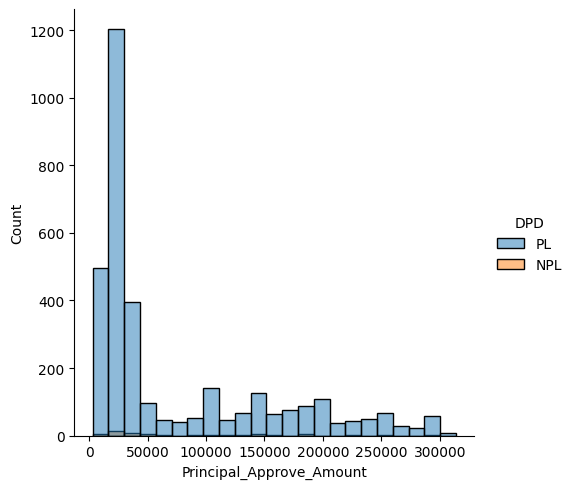

In [17]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="Principal_Approve_Amount", hue="DPD")

<Figure size 1500x1000 with 0 Axes>

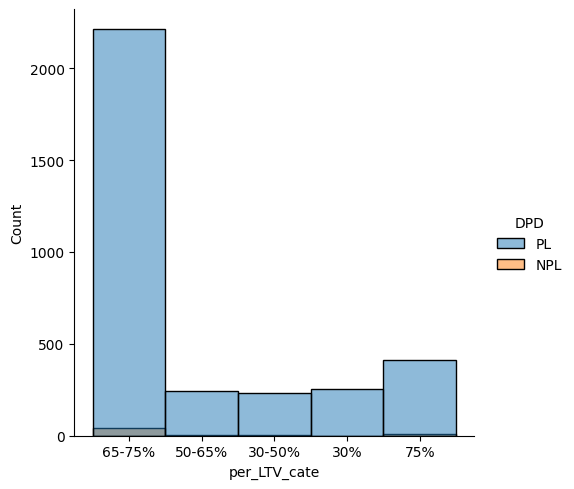

In [18]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="per_LTV_cate", hue="DPD")

C:\Users\Admin\AppData\Local\Temp\ipykernel_20620\3735391570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Principal_Approve_Amount'])


<Axes: xlabel='Principal_Approve_Amount', ylabel='Density'>

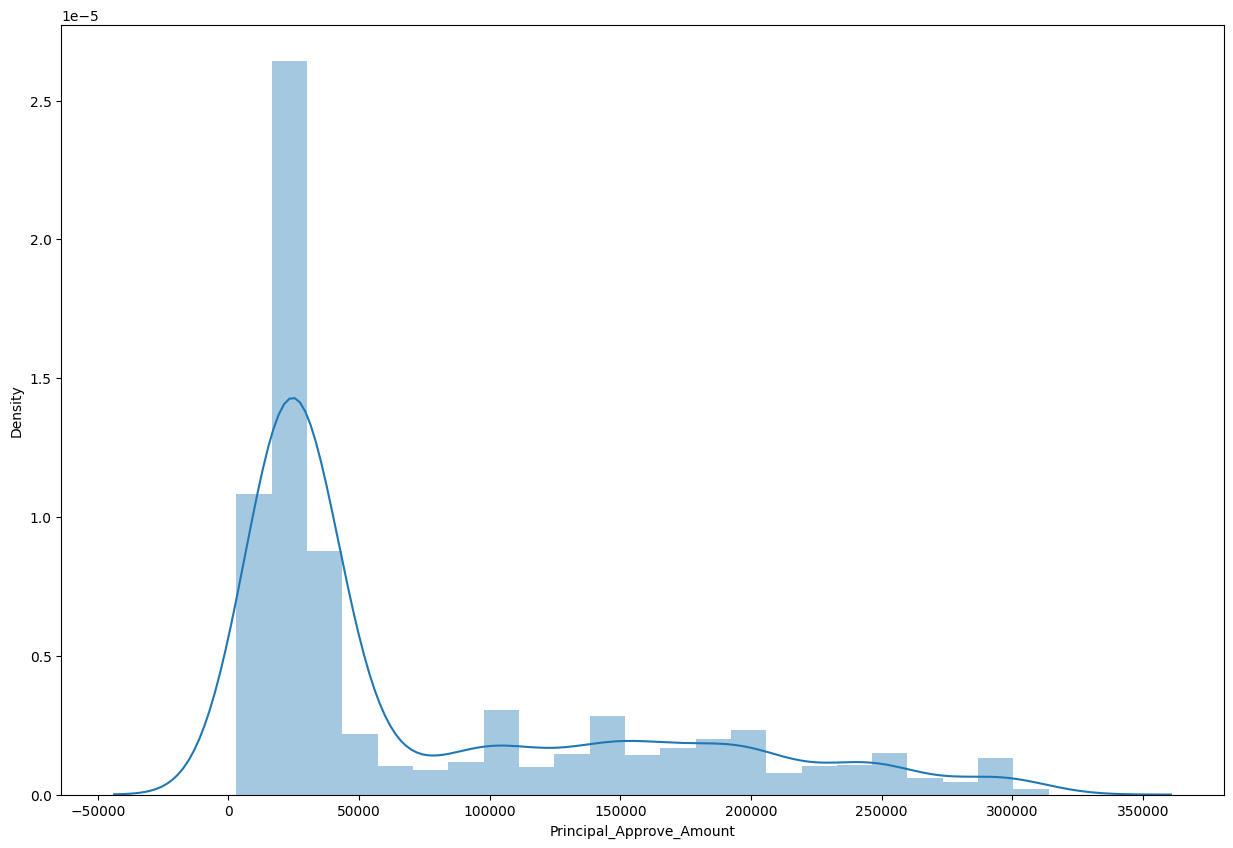

In [19]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal_Approve_Amount'])

In [20]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [21]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [22]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age']]

In [23]:


X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

In [26]:
X_train.shape

(1875, 12)

In [27]:
X_test.shape

(1535, 12)

In [28]:
y_train.shape

(1875,)

In [29]:
y_test.shape

(1535,)

In [30]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [31]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [32]:
y_train.value_counts()

DPD
PL     1834
NPL      41
Name: count, dtype: int64

In [33]:
y_test.value_counts()

DPD
PL     1521
NPL      14
Name: count, dtype: int64

<Axes: title={'center': 'Train target'}, xlabel='DPD'>

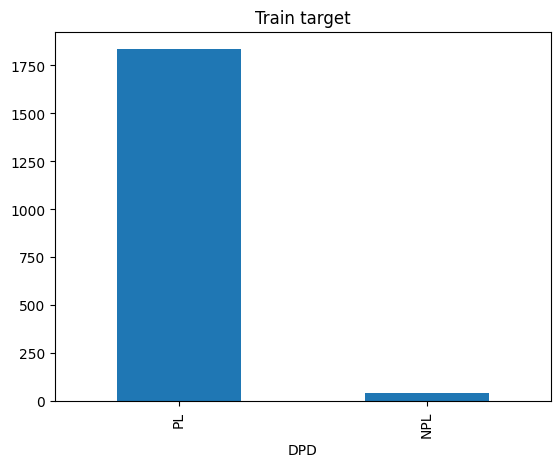

In [34]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

In [35]:
df.shape

(3410, 20)

# Imbalance Oversampling SMOTE

In [36]:
#pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [38]:
#Fitting SMOTE to the train set
smote = SMOTE(sampling_strategy='auto', random_state=101)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

print(sorted(Counter(smote_y_train).items()),smote_y_train.shape)

[('NPL', 1834), ('PL', 1834)] (3668,)


In [39]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(smote_y_train))

Before sampling class distribution :  Counter({'PL': 1834, 'NPL': 41})
After sampling class distribution :  Counter({'PL': 1834, 'NPL': 1834})


### หาที่มา 1834

In [40]:
df.shape

(3410, 20)

In [41]:
smote_X_train.shape

(3668, 12)

In [42]:
smote_y_train.shape

(3668,)

In [43]:
smote_y_train.value_counts()

DPD
PL     1834
NPL    1834
Name: count, dtype: int64

In [44]:
# df.to_csv("test.csv")

In [45]:
y_test.value_counts()

DPD
PL     1521
NPL      14
Name: count, dtype: int64

<Axes: title={'center': 'Train target'}, xlabel='DPD'>

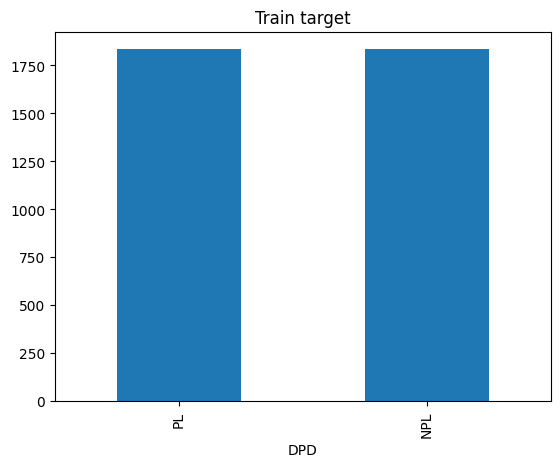

In [46]:
plt.title('Train target')
smote_y_train.value_counts().plot(kind='bar')

<Axes: title={'center': 'Test target'}, xlabel='DPD'>

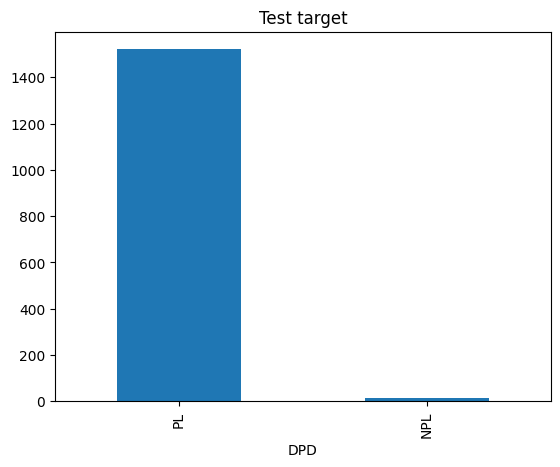

In [47]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [50]:
model.feature_importances_

array([0.12389214, 0.03187862, 0.00442502, 0.06652924, 0.1445981 ,
       0.0101764 , 0.07409624, 0.19504837, 0.02862798, 0.1907795 ,
       0.06154133, 0.06840706])

In [51]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Vehicle_Model                   0.195048
Evaluation_Amount               0.190780
Total_Income_Amount_(Month)     0.144598
Principal_Approve_Amount        0.123892
Vehicle_Brand                   0.074096
Vehicle_Age                     0.068407
Occupation_Description          0.066529
age                             0.061541
Repayment_Tenor_Month_Number    0.031879
Vehicle_Release_Year            0.028628
Collateral_Type_Code            0.010176
Gender                          0.004425
dtype: float64

In [52]:
fs.sum()

1.0

<Axes: >

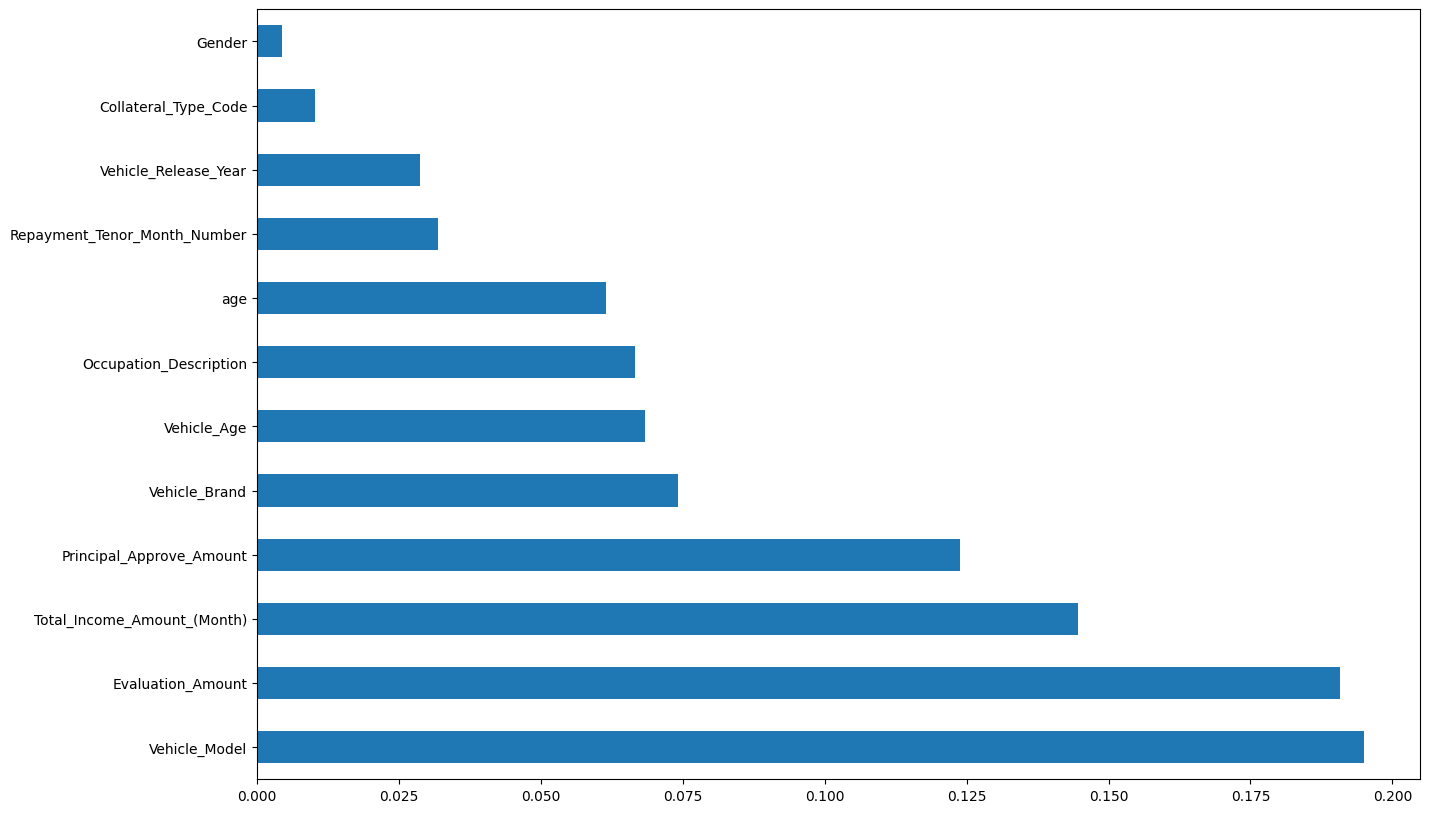

In [53]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [54]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [55]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    smote_X_train, X_test, smote_y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
    model.fit(smote_X_train, smote_y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation mean is ", np.mean(score)*100)
    print("Cross Validation std is ", np.std(score)*100)
    return model

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [57]:
kf = KFold(n_splits=10, random_state=101, shuffle=True)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
rf = RandomForestRegressor(n_estimators=500, random_state=101)

In [60]:
# scores = cross_val_score(rf, X, y, cv=kf)
# print(f"Cross Validation Score: {np.mean(scores)*100:0.2f}%")

In [61]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [62]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [63]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# cv_lr = classify(model,X,y)

In [64]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy')
# cv_dt = classify(model,X,y)

In [65]:
# sum(cv_dt.predict(X) == y)

In [66]:
# pd.crosstab(y, cv_dt.predict(X))

In [67]:
# 424/(424+54)

In [68]:
# 424/(424+68)

In [69]:
# len(y)

### DecisionTree

In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [71]:
#prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, smote_X_train, smote_y_train, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 92.05211726384364
[0.91553134 0.97275204 0.97547684 0.96185286 0.95912807 0.95912807
 0.95912807 0.95367847 0.95081967 0.94808743]
Cross Validation mean is  95.55582853143939
Cross Validation std is  1.5665836478024835


In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   12]
 [ 110 1411]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.14      0.02      0.03       112
          PL       0.93      0.99      0.96      1423

    accuracy                           0.92      1535
   macro avg       0.54      0.50      0.50      1535
weighted avg       0.87      0.92      0.89      1535



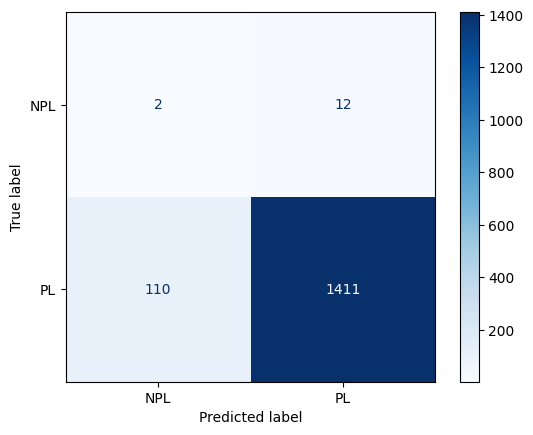

In [73]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

In [74]:
# from sklearn.metrics import RocCurveDisplay
# RocCurveDisplay(classifier, X_test, y_test)
# plt.grid()

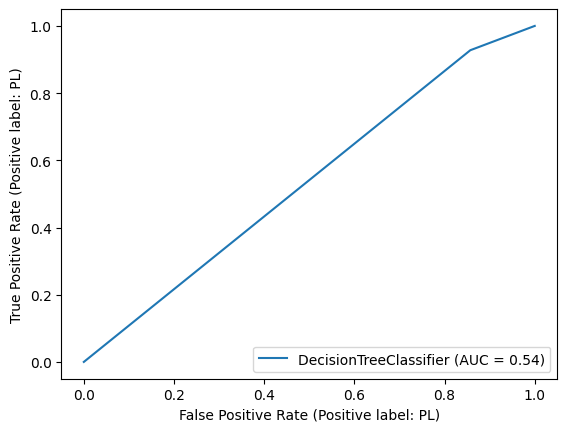

In [75]:
# sklearn 1.2.2
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)

### Prunning

In [76]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train, smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy: 70.35830618892508
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.32124490176256043


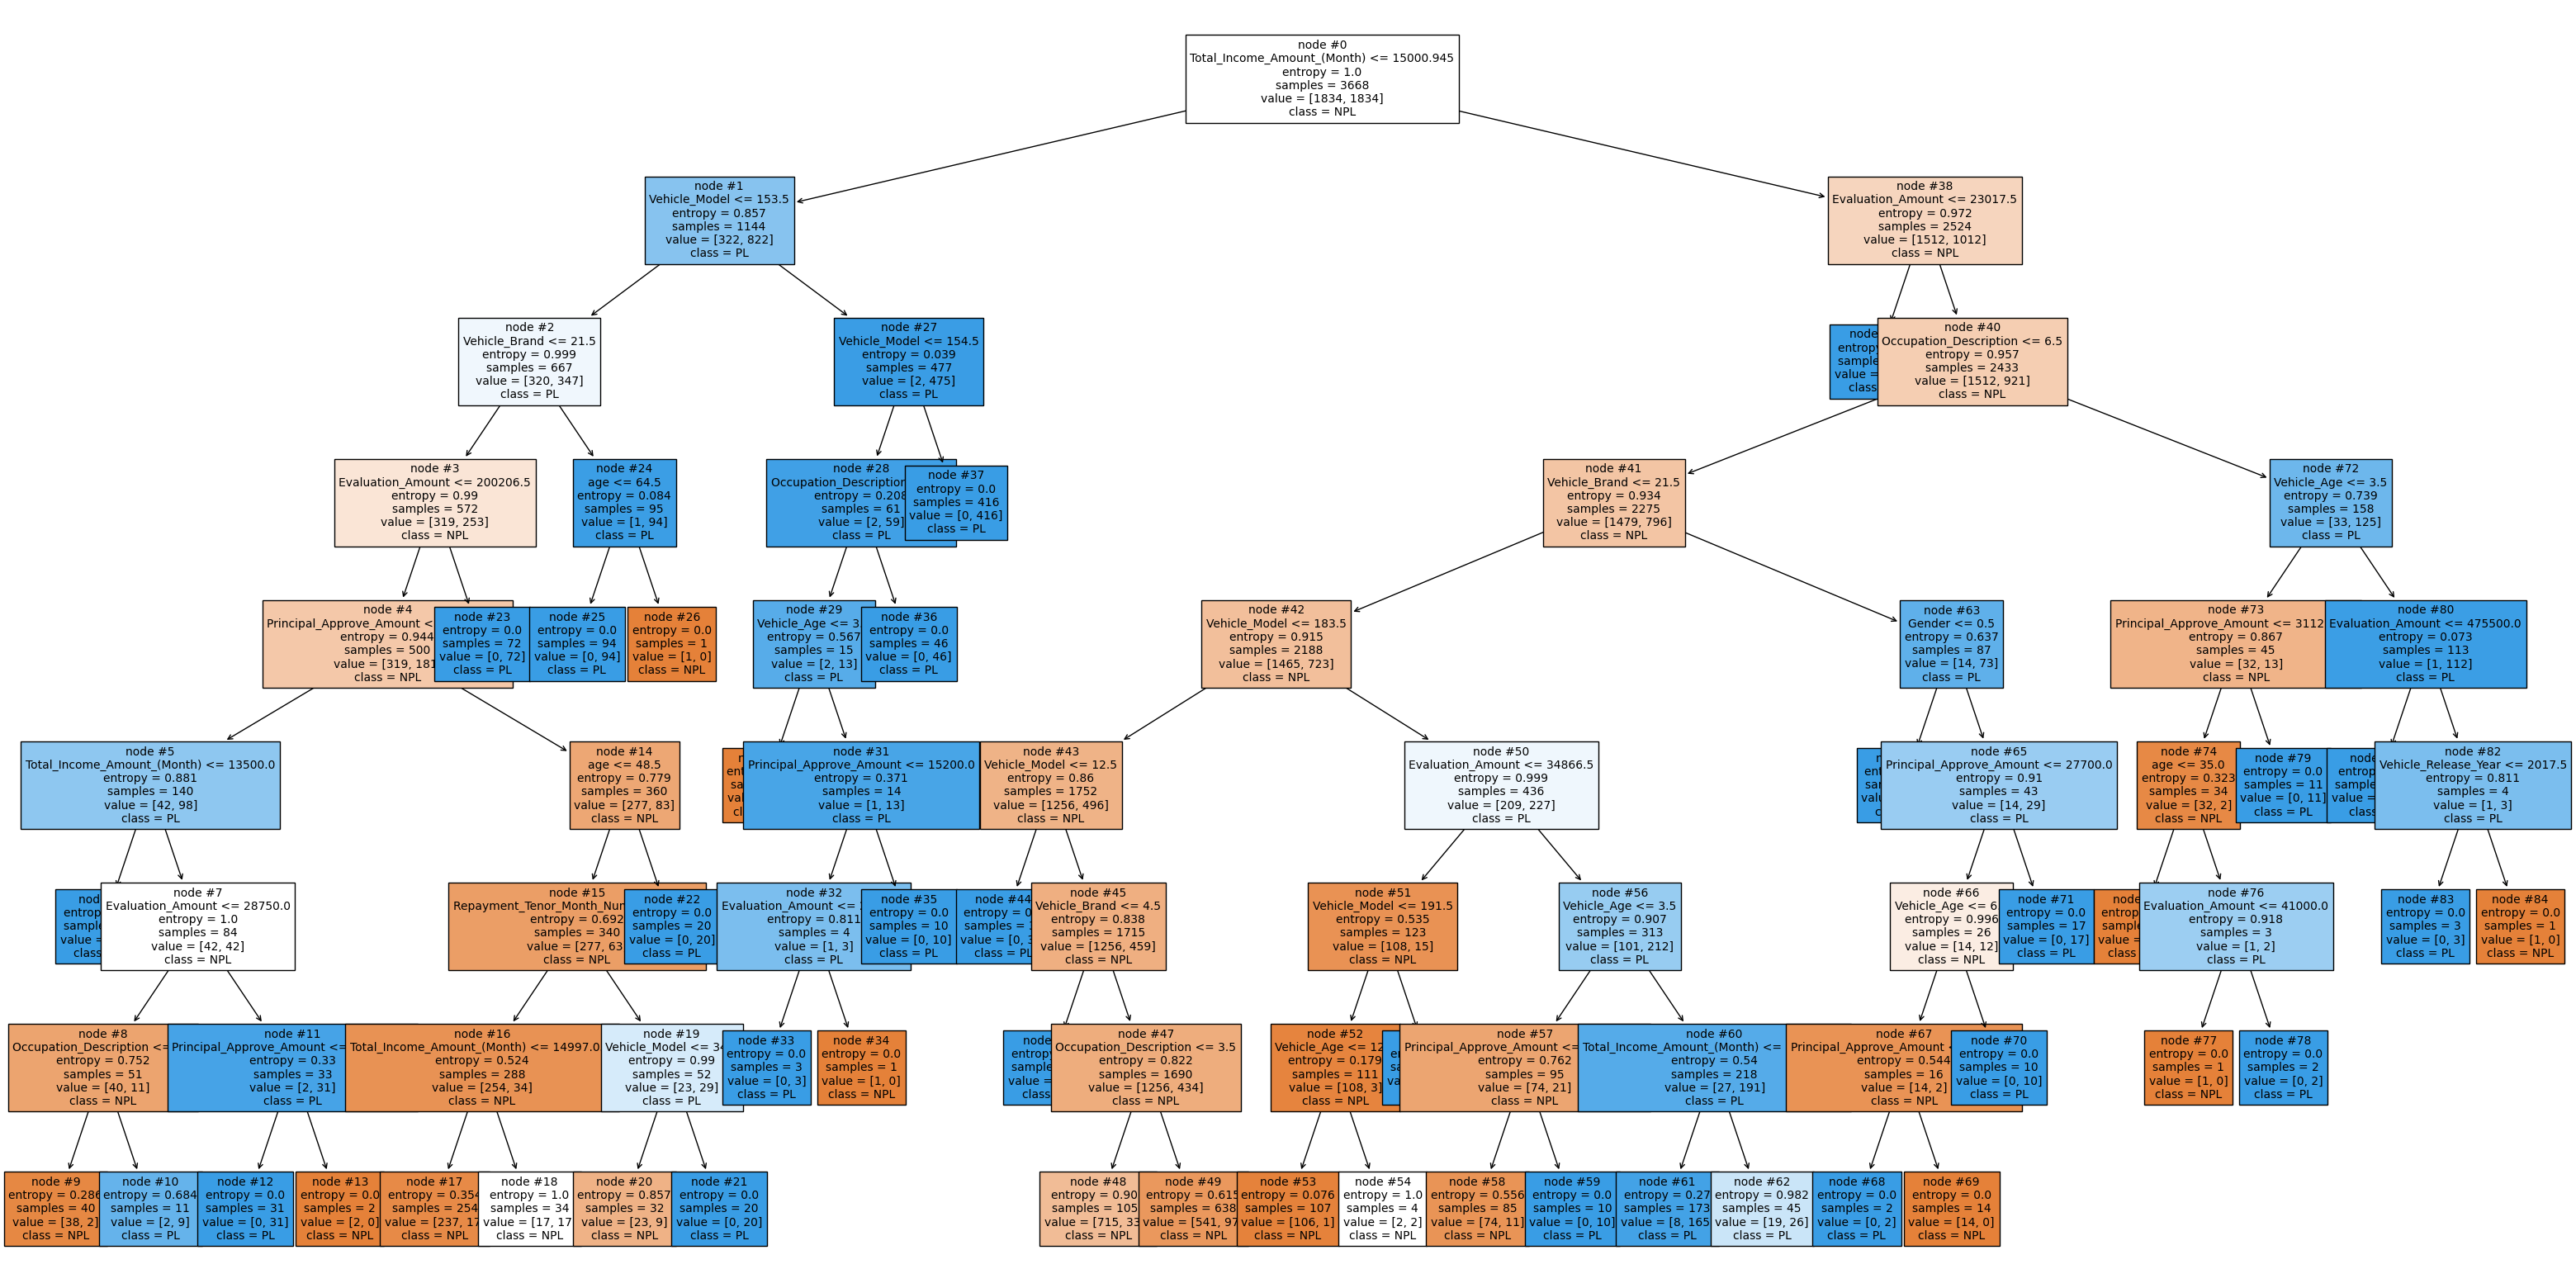

In [77]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [78]:
import graphviz

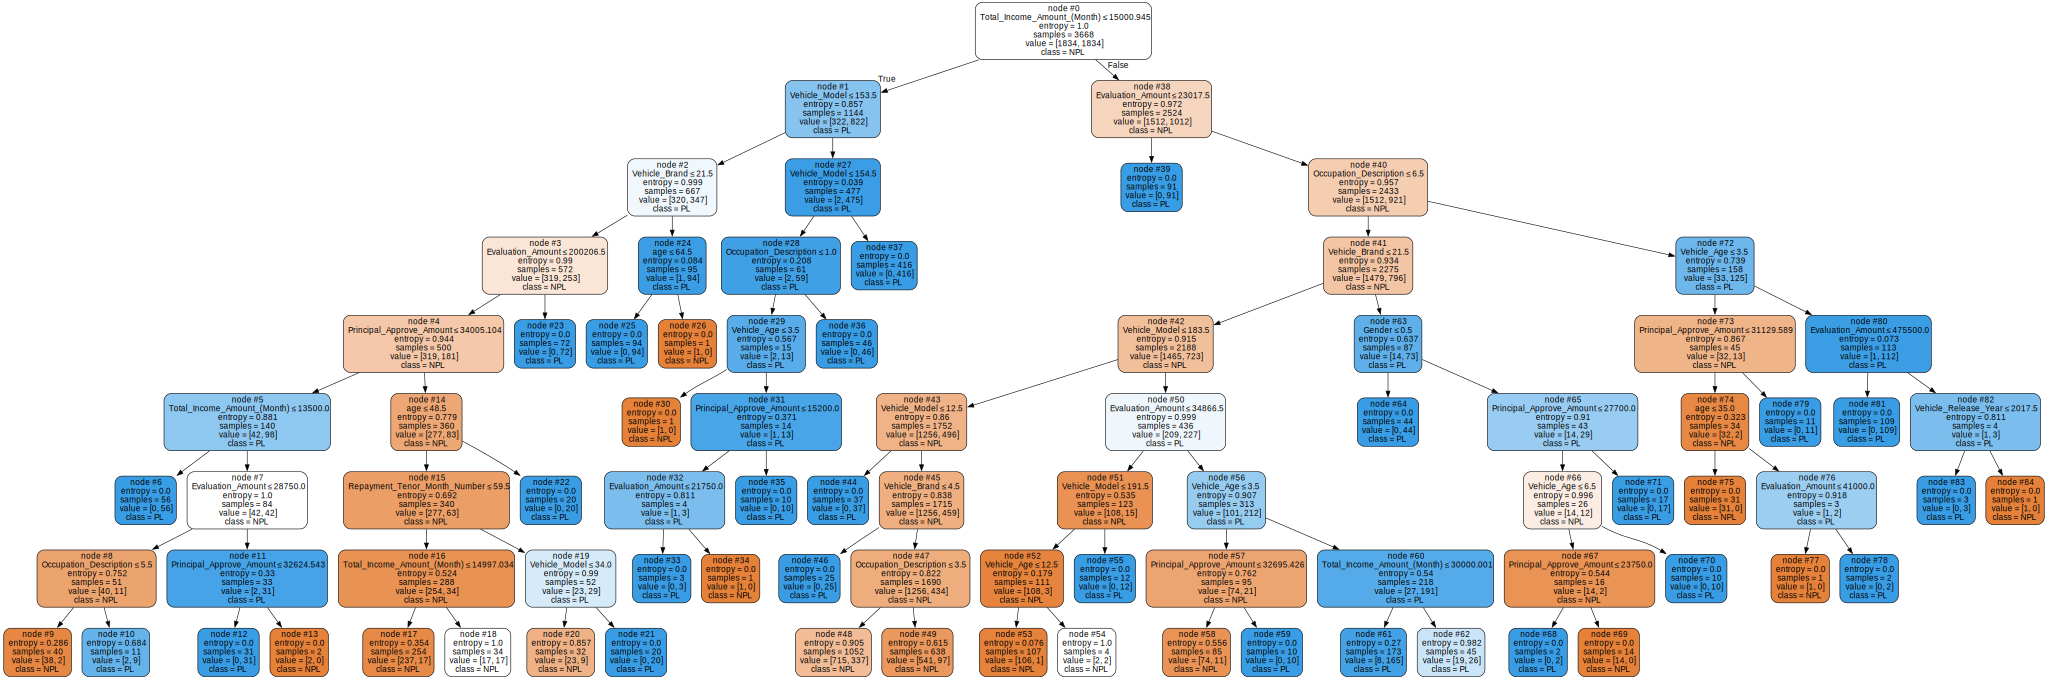

In [79]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   6    8]
 [ 447 1074]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.43      0.01      0.03       453
          PL       0.71      0.99      0.83      1082

    accuracy                           0.70      1535
   macro avg       0.57      0.50      0.43      1535
weighted avg       0.62      0.70      0.59      1535



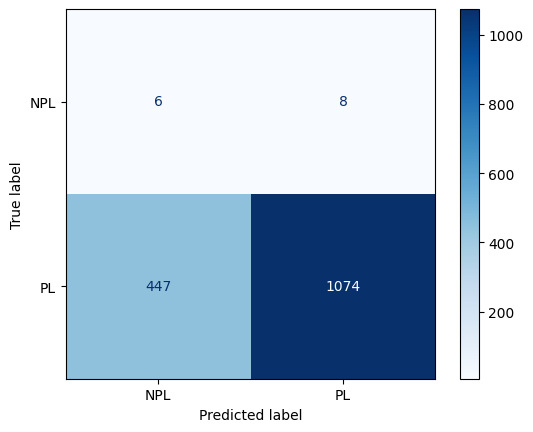

In [81]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

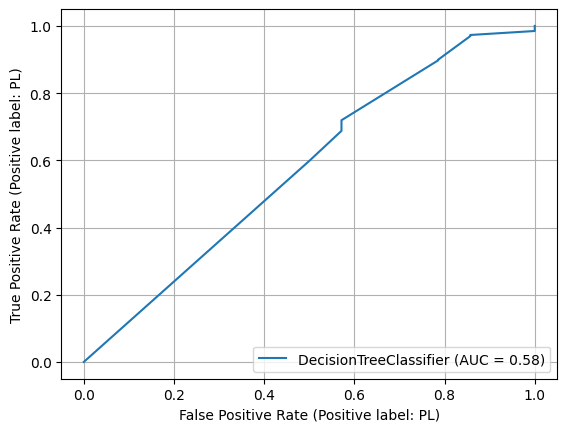

In [82]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [83]:
# กำหนดค่าพารามิเตอร์ที่ต้องการทดสอบ
max_depths = [3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
min_samples_splits = [2, 3, 4, 5]
min_samples_leaves = [1, 2, 3, 4]

best_accuracy = 0
best_parameters = {}

# ทดสอบโมเดล Decision tree ด้วยค่าพารามิเตอร์ที่ต้องการ
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(smote_X_train,smote_y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, accuracy: {}".format(max_depth, min_samples_split, min_samples_leaf, accuracy))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters['max_depth'] = max_depth
                best_parameters['min_samples_split'] = min_samples_split
                best_parameters['min_samples_leaf'] = min_samples_leaf

# พิมพ์ค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", best_parameters)

max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 2, min_samples_leaf: 2, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 2, min_samples_leaf: 3, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 2, min_samples_leaf: 4, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 3, min_samples_leaf: 1, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 3, min_samples_leaf: 2, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 3, min_samples_leaf: 3, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 3, min_samples_leaf: 4, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 4, min_samples_leaf: 1, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 4, min_samples_leaf: 2, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 4, min_samples_leaf: 3, accuracy: 0.4944625407166124
max_depth: 3, min_samples_split: 4, min_samples_leaf: 

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(max_depth = 15, min_samples_split = 3, min_samples_leaf = 4, random_state=101)

model.fit(smote_X_train,smote_y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=3,
                       random_state=101)

In [85]:
model.feature_importances_

array([0.16347556, 0.03479889, 0.00694298, 0.05145179, 0.17191174,
       0.01370825, 0.05361651, 0.1625322 , 0.0072607 , 0.15647707,
       0.10059442, 0.07722989])

In [86]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Total_Income_Amount_(Month)     0.171912
Principal_Approve_Amount        0.163476
Vehicle_Model                   0.162532
Evaluation_Amount               0.156477
age                             0.100594
Vehicle_Age                     0.077230
Vehicle_Brand                   0.053617
Occupation_Description          0.051452
Repayment_Tenor_Month_Number    0.034799
Collateral_Type_Code            0.013708
Vehicle_Release_Year            0.007261
Gender                          0.006943
dtype: float64

In [87]:
fs.sum()

0.9999999999999999

<Axes: >

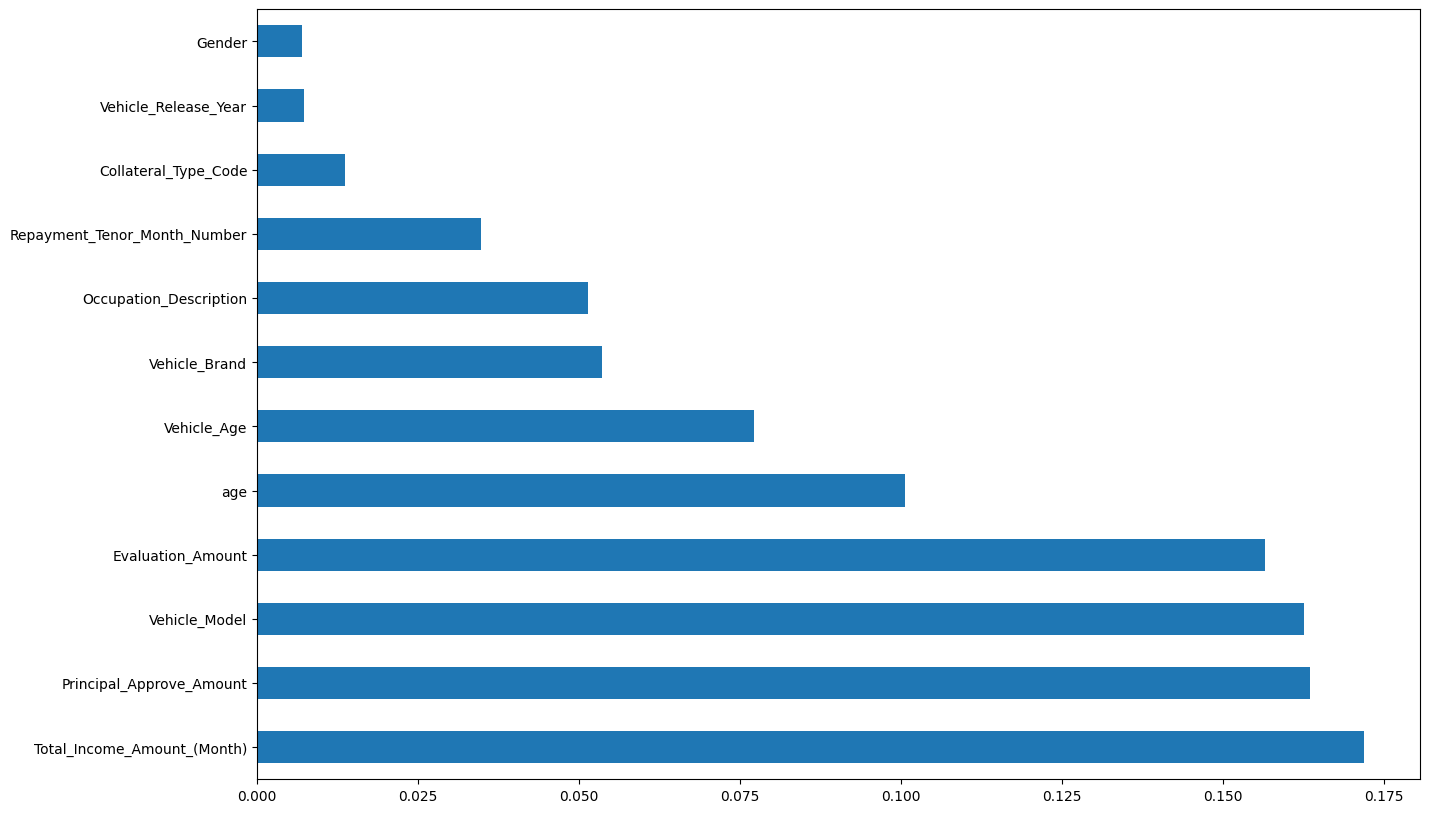

In [88]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [89]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(max_depth = 15, min_samples_split = 3, min_samples_leaf = 4, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train,smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy: 88.59934853420195
[0.98533724 0.97653959 0.97653959 0.96774194 0.95014663 0.97360704
 0.96480938 0.97360704 0.96480938 0.96480938]
Cross Validation mean is  96.97947214076248
Cross Validation std is  0.9090909090909082


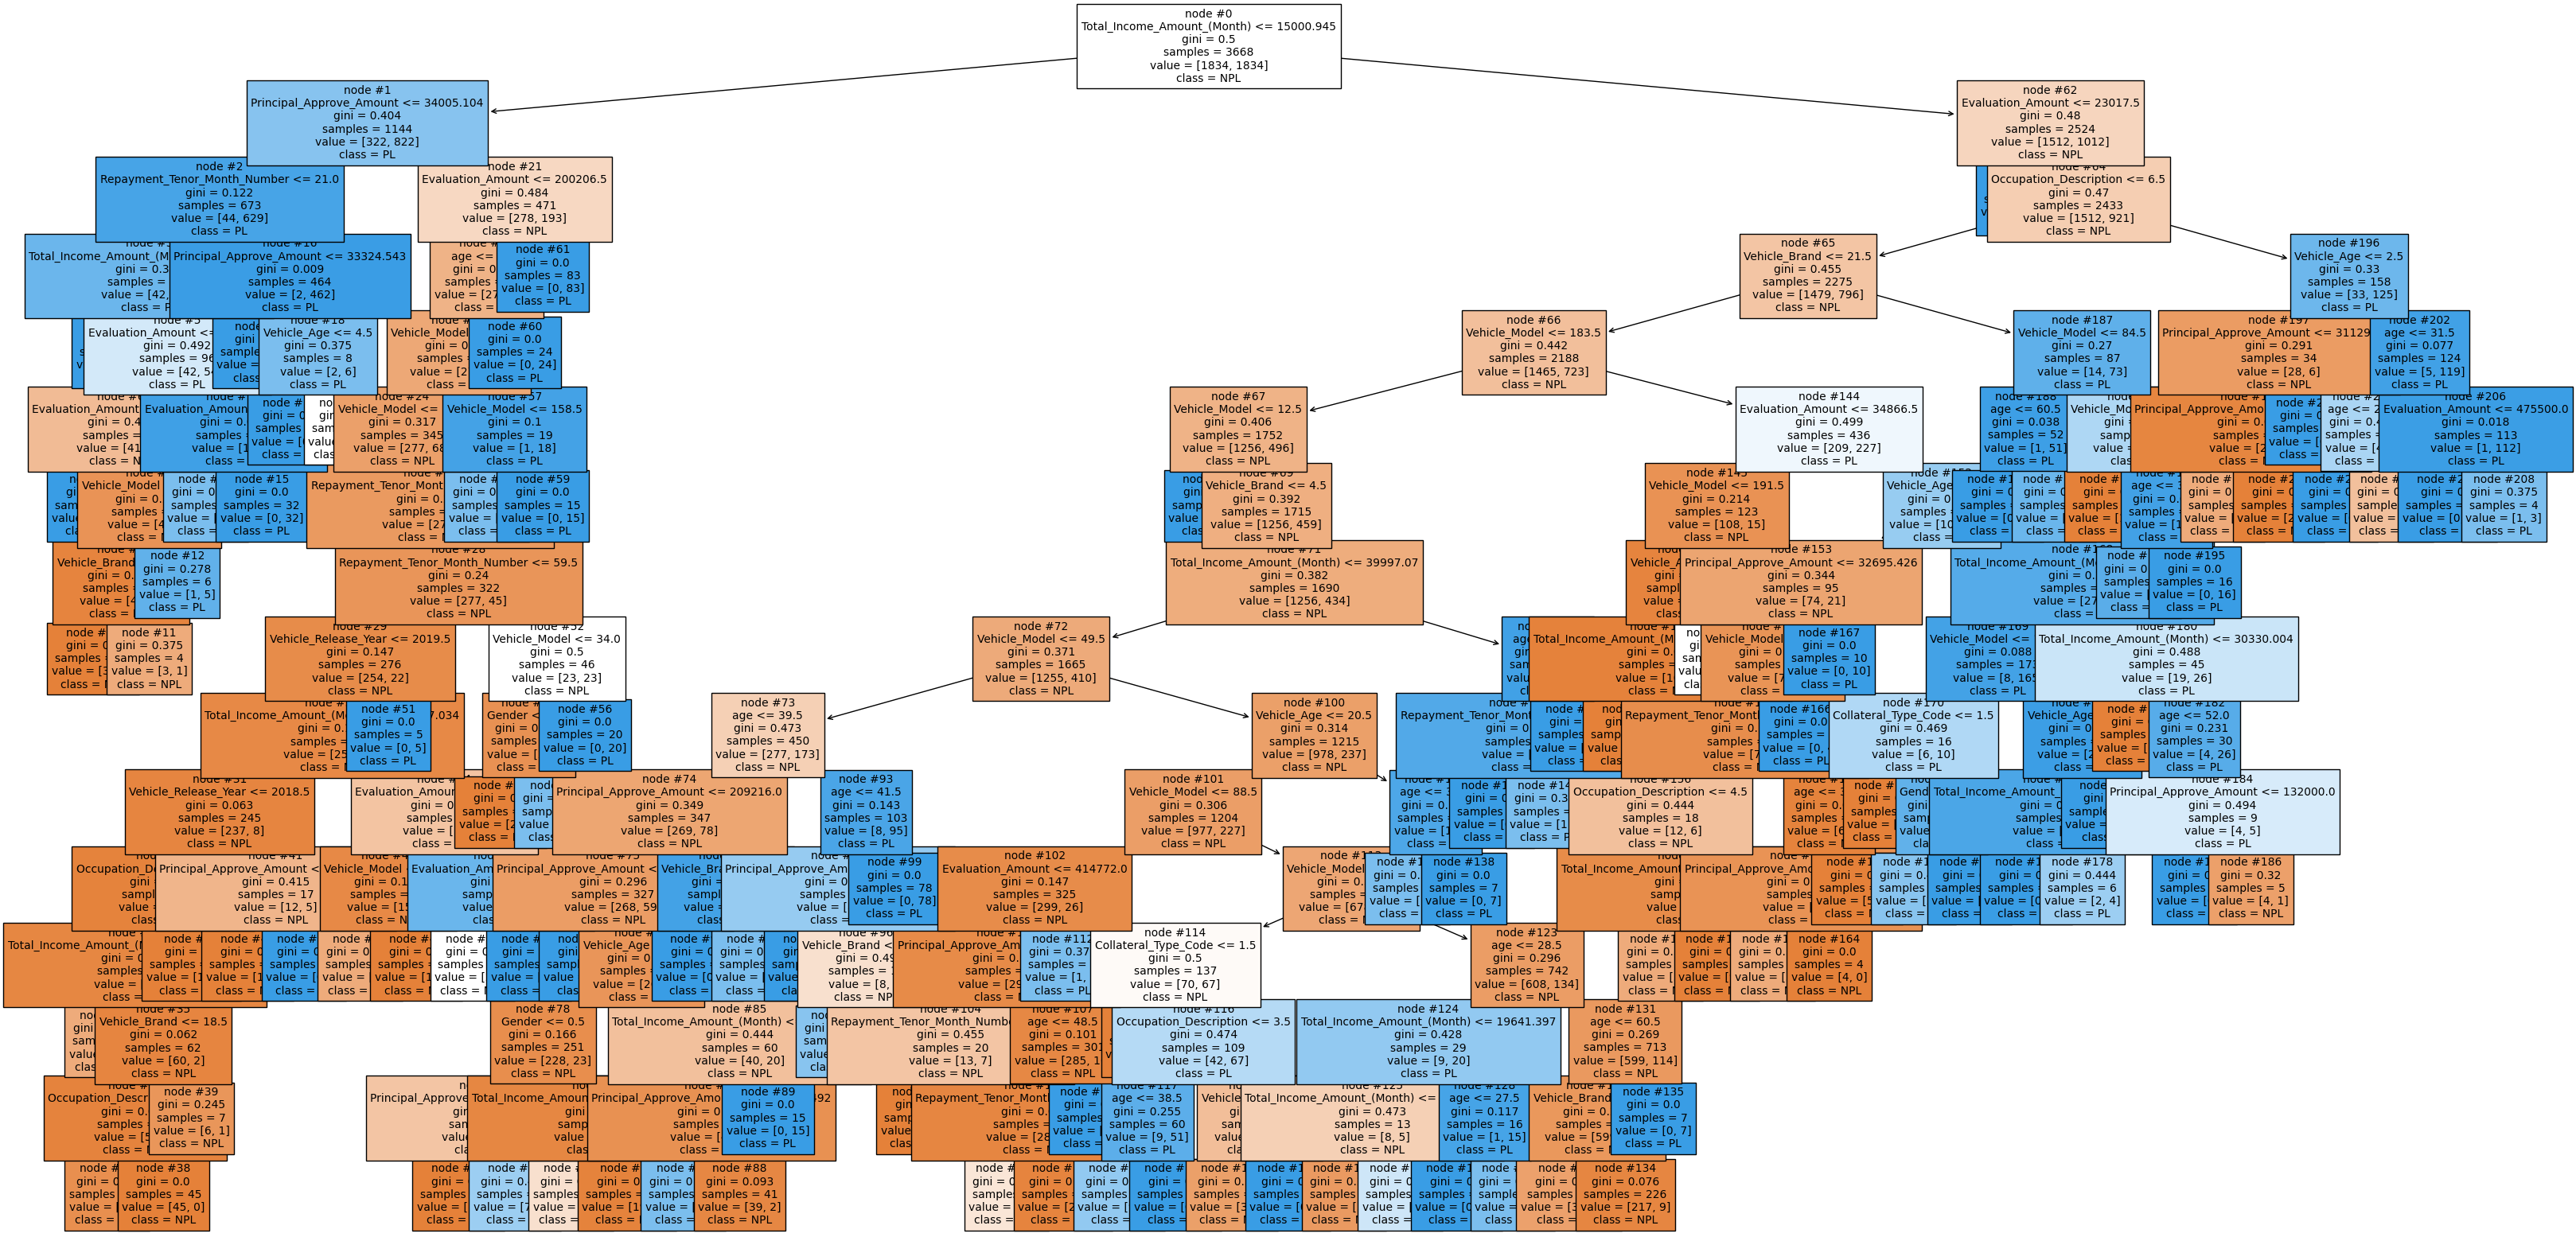

In [90]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [91]:
import graphviz

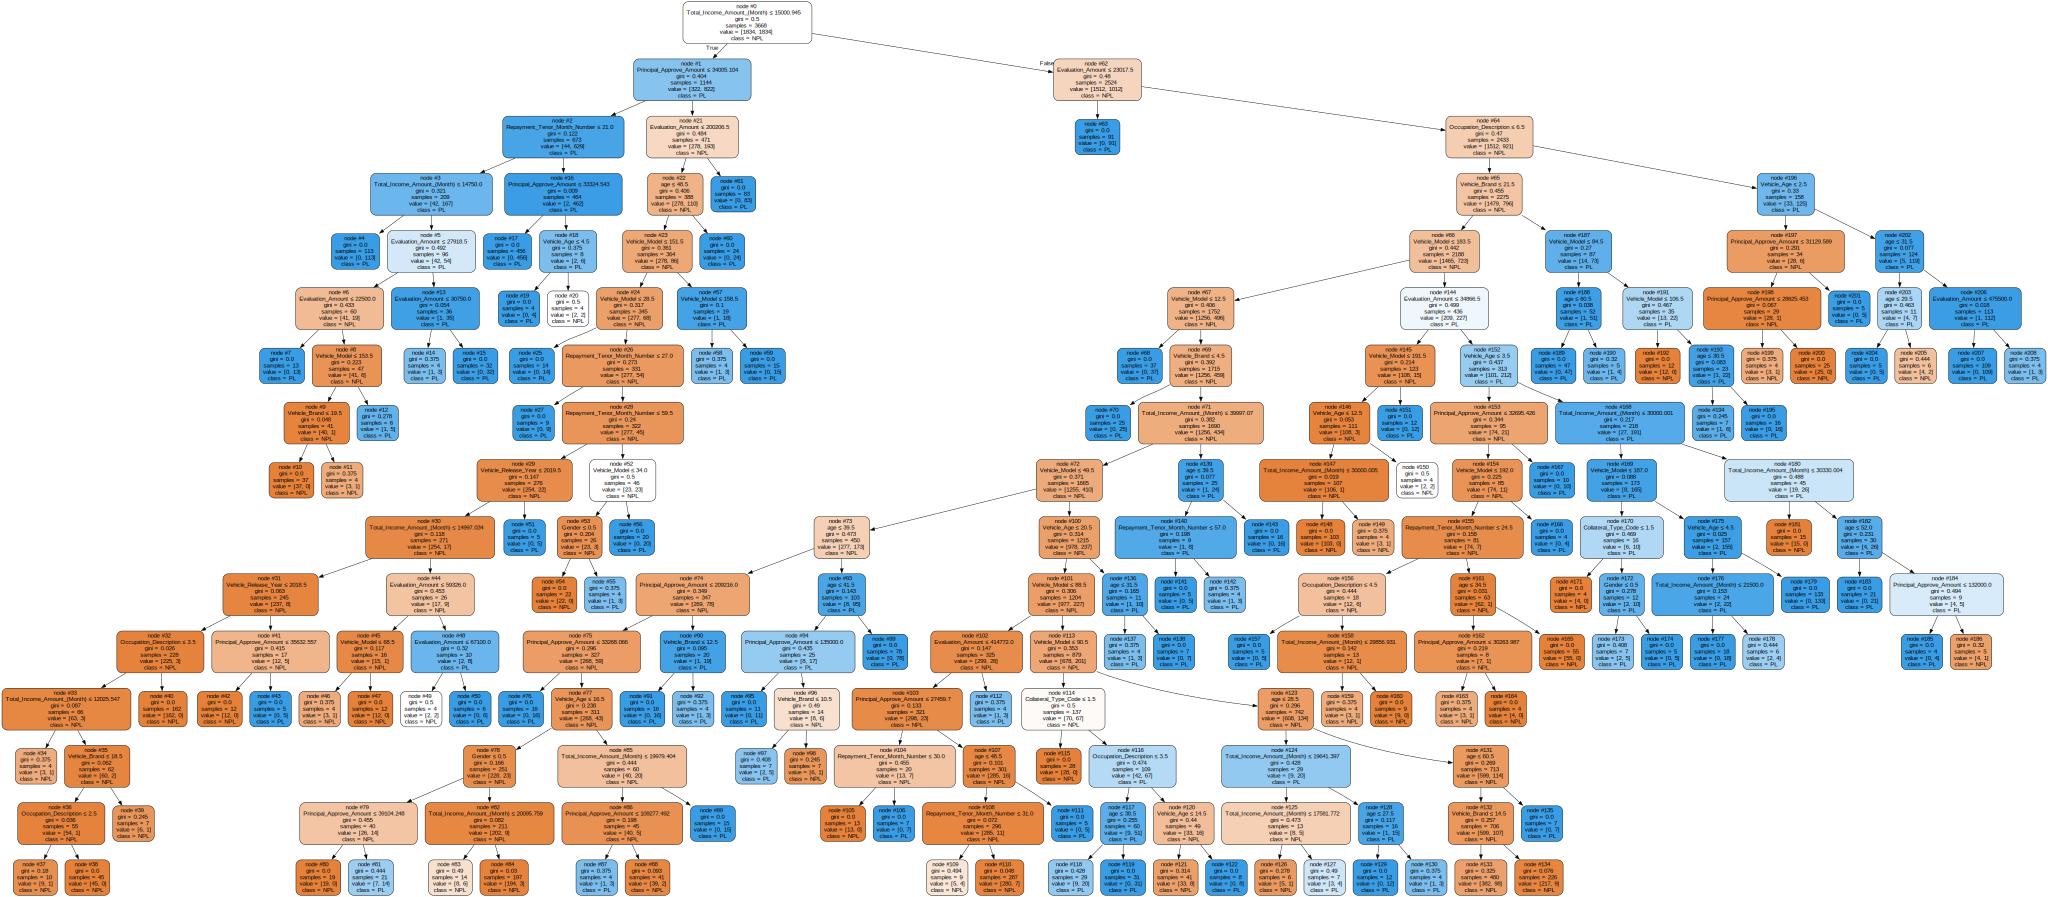

In [92]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   12]
 [ 163 1358]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.14      0.01      0.02       165
          PL       0.89      0.99      0.94      1370

    accuracy                           0.89      1535
   macro avg       0.52      0.50      0.48      1535
weighted avg       0.81      0.89      0.84      1535



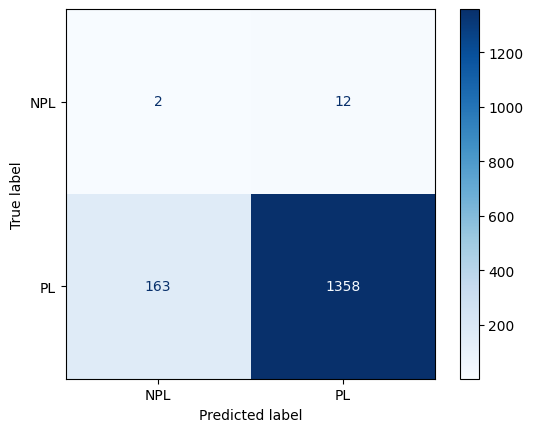

In [94]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

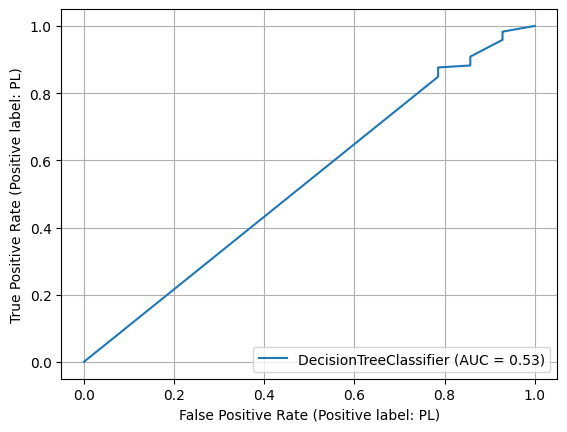

In [95]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [97]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 98.11074918566776
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is  98.38709677419354
Cross Validation std is  0.14662756598240456


In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   12]
 [  17 1504]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.14      0.11      0.12        19
          PL       0.99      0.99      0.99      1516

    accuracy                           0.98      1535
   macro avg       0.57      0.55      0.56      1535
weighted avg       0.98      0.98      0.98      1535



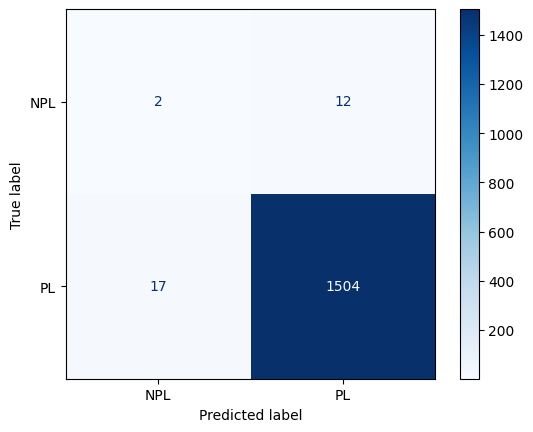

In [99]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

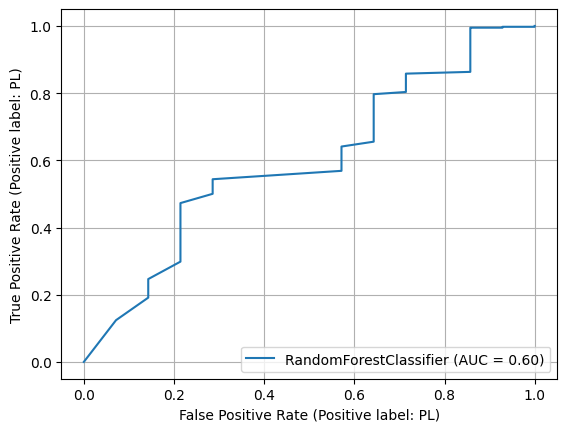

In [100]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

In [101]:
from sklearn.model_selection import RandomizedSearchCV

# Under Sampling

In [102]:
from imblearn import under_sampling, over_sampling
from collections import Counter

In [103]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age']]

X = cols
# test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

<Axes: >

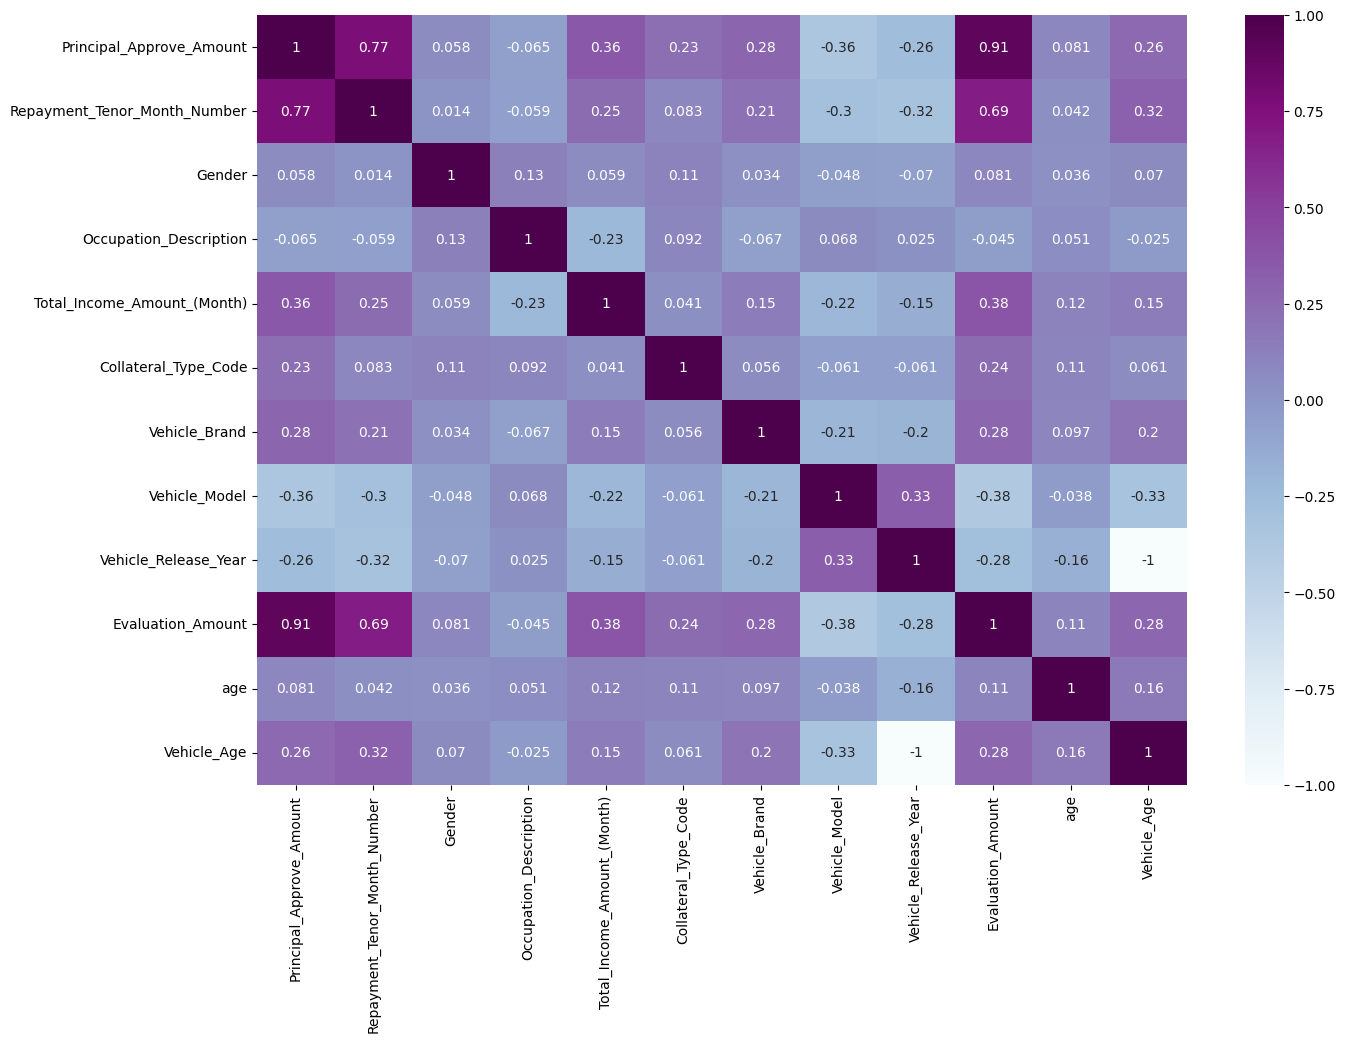

In [104]:
corr = cols.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [105]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('NPL', 41), ('PL', 41)] (82,)


In [106]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(y_resampled))

Before sampling class distribution :  Counter({'PL': 1834, 'NPL': 41})
After sampling class distribution :  Counter({'NPL': 41, 'PL': 41})


In [107]:
X_resampled.shape

(82, 12)

In [108]:
y_resampled.shape

(82,)

In [109]:
X_test.shape

(1535, 12)

In [110]:
y_test.shape

(1535,)

In [111]:
y_resampled.value_counts()

DPD
NPL    41
PL     41
Name: count, dtype: int64

In [112]:
y_test.value_counts()

DPD
PL     1521
NPL      14
Name: count, dtype: int64

<Axes: title={'center': 'Train target'}, xlabel='DPD'>

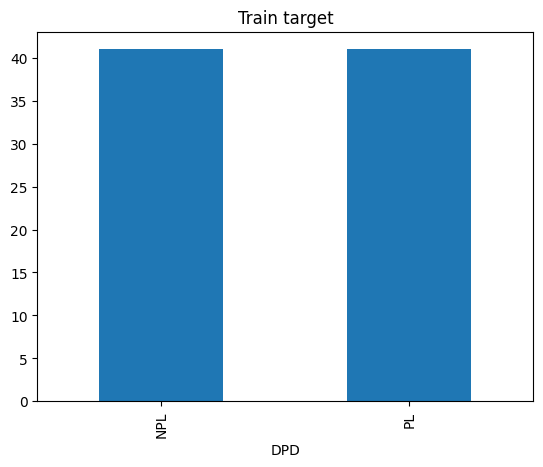

In [113]:
plt.title('Train target')
y_resampled.value_counts().plot(kind='bar')

<Axes: title={'center': 'Test target'}, xlabel='DPD'>

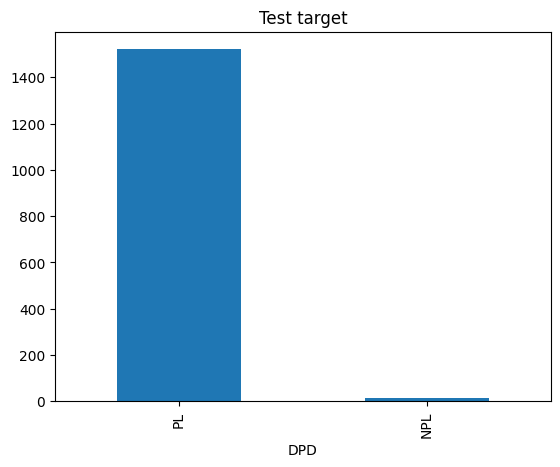

In [114]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

## Feature Importance

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy', random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [116]:
X = cols
y = df['DPD']

In [117]:
model.feature_importances_

array([0.1081516 , 0.02287146, 0.03359619, 0.04402001, 0.07554104,
       0.        , 0.0802998 , 0.1117795 , 0.06475663, 0.30732289,
       0.06524422, 0.08641666])

In [118]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Evaluation_Amount               0.307323
Vehicle_Model                   0.111780
Principal_Approve_Amount        0.108152
Vehicle_Age                     0.086417
Vehicle_Brand                   0.080300
Total_Income_Amount_(Month)     0.075541
age                             0.065244
Vehicle_Release_Year            0.064757
Occupation_Description          0.044020
Gender                          0.033596
Repayment_Tenor_Month_Number    0.022871
Collateral_Type_Code            0.000000
dtype: float64

In [119]:
fs.sum()

1.0000000000000002

<Axes: >

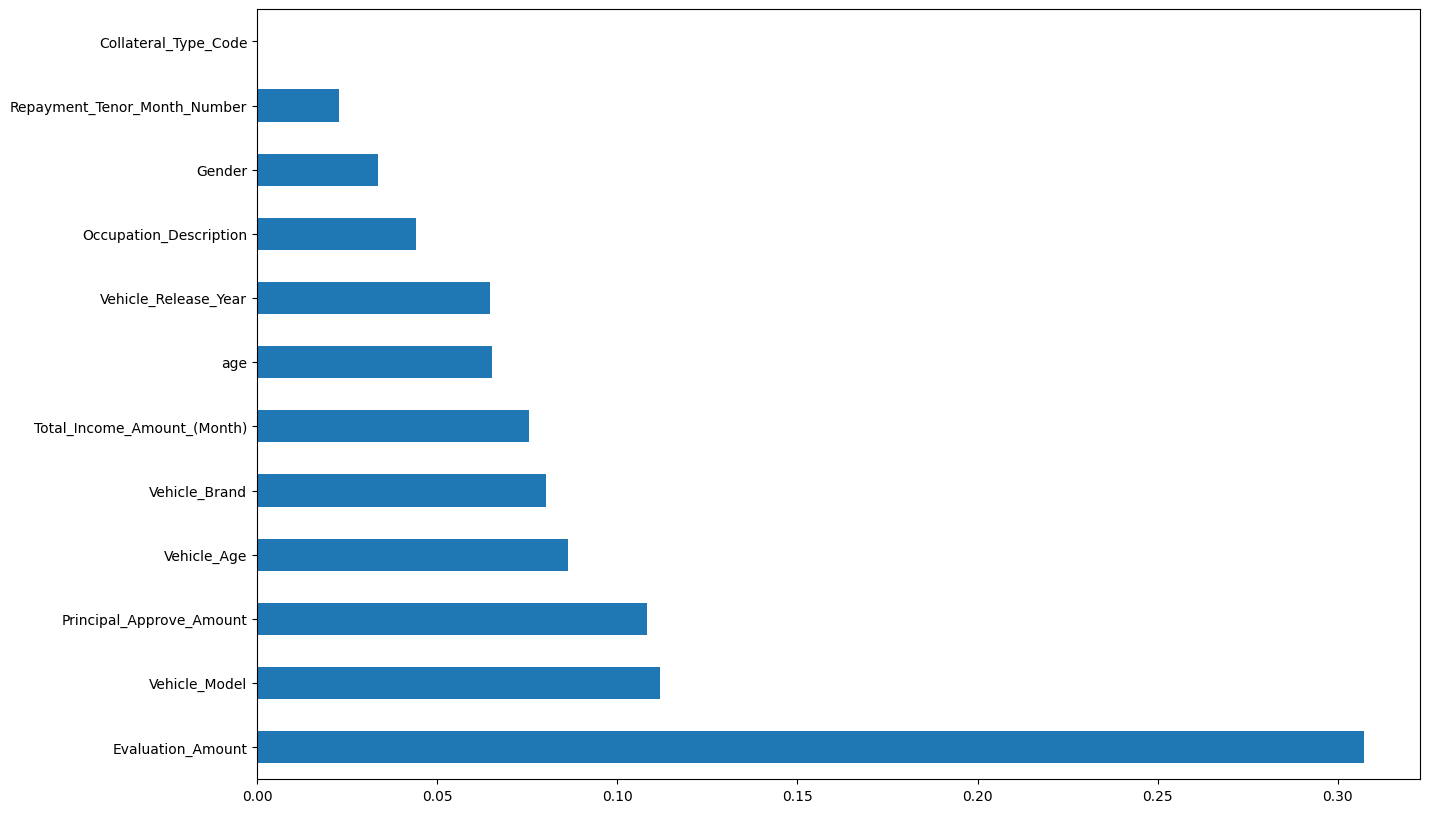

In [120]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    X_resampled, X_test, y_resampled, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
    model.fit(X_resampled, y_resampled)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    print("Cross Validation is ", np.std(score)*100)
    return model

In [122]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=101)
# cv_lr = classify(model,X,y)

In [123]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy', random_state=101)
# cv_dt = classify(model,X,y)

### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [125]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 58.697068403908794
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.32124490176256043


In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred,y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  6   8]
 [626 895]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.43      0.01      0.02       632
          PL       0.59      0.99      0.74       903

    accuracy                           0.59      1535
   macro avg       0.51      0.50      0.38      1535
weighted avg       0.52      0.59      0.44      1535



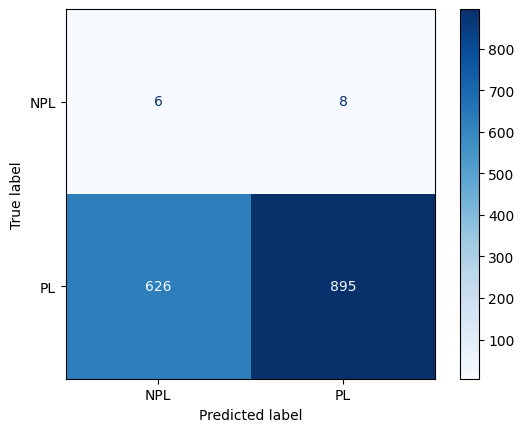

In [127]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

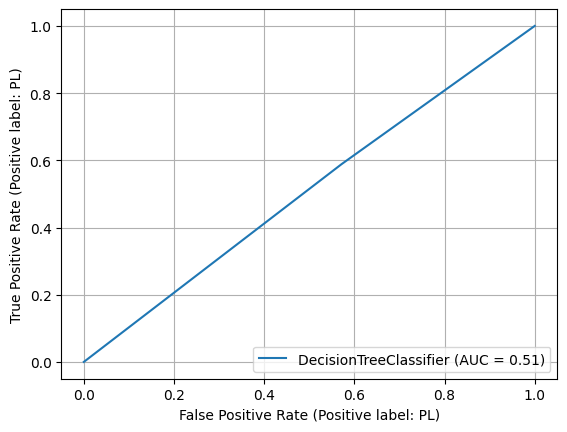

In [128]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

### Prunning

In [129]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion='entropy',max_depth = 11, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 59.08794788273616
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation stdis  0.32124490176256043


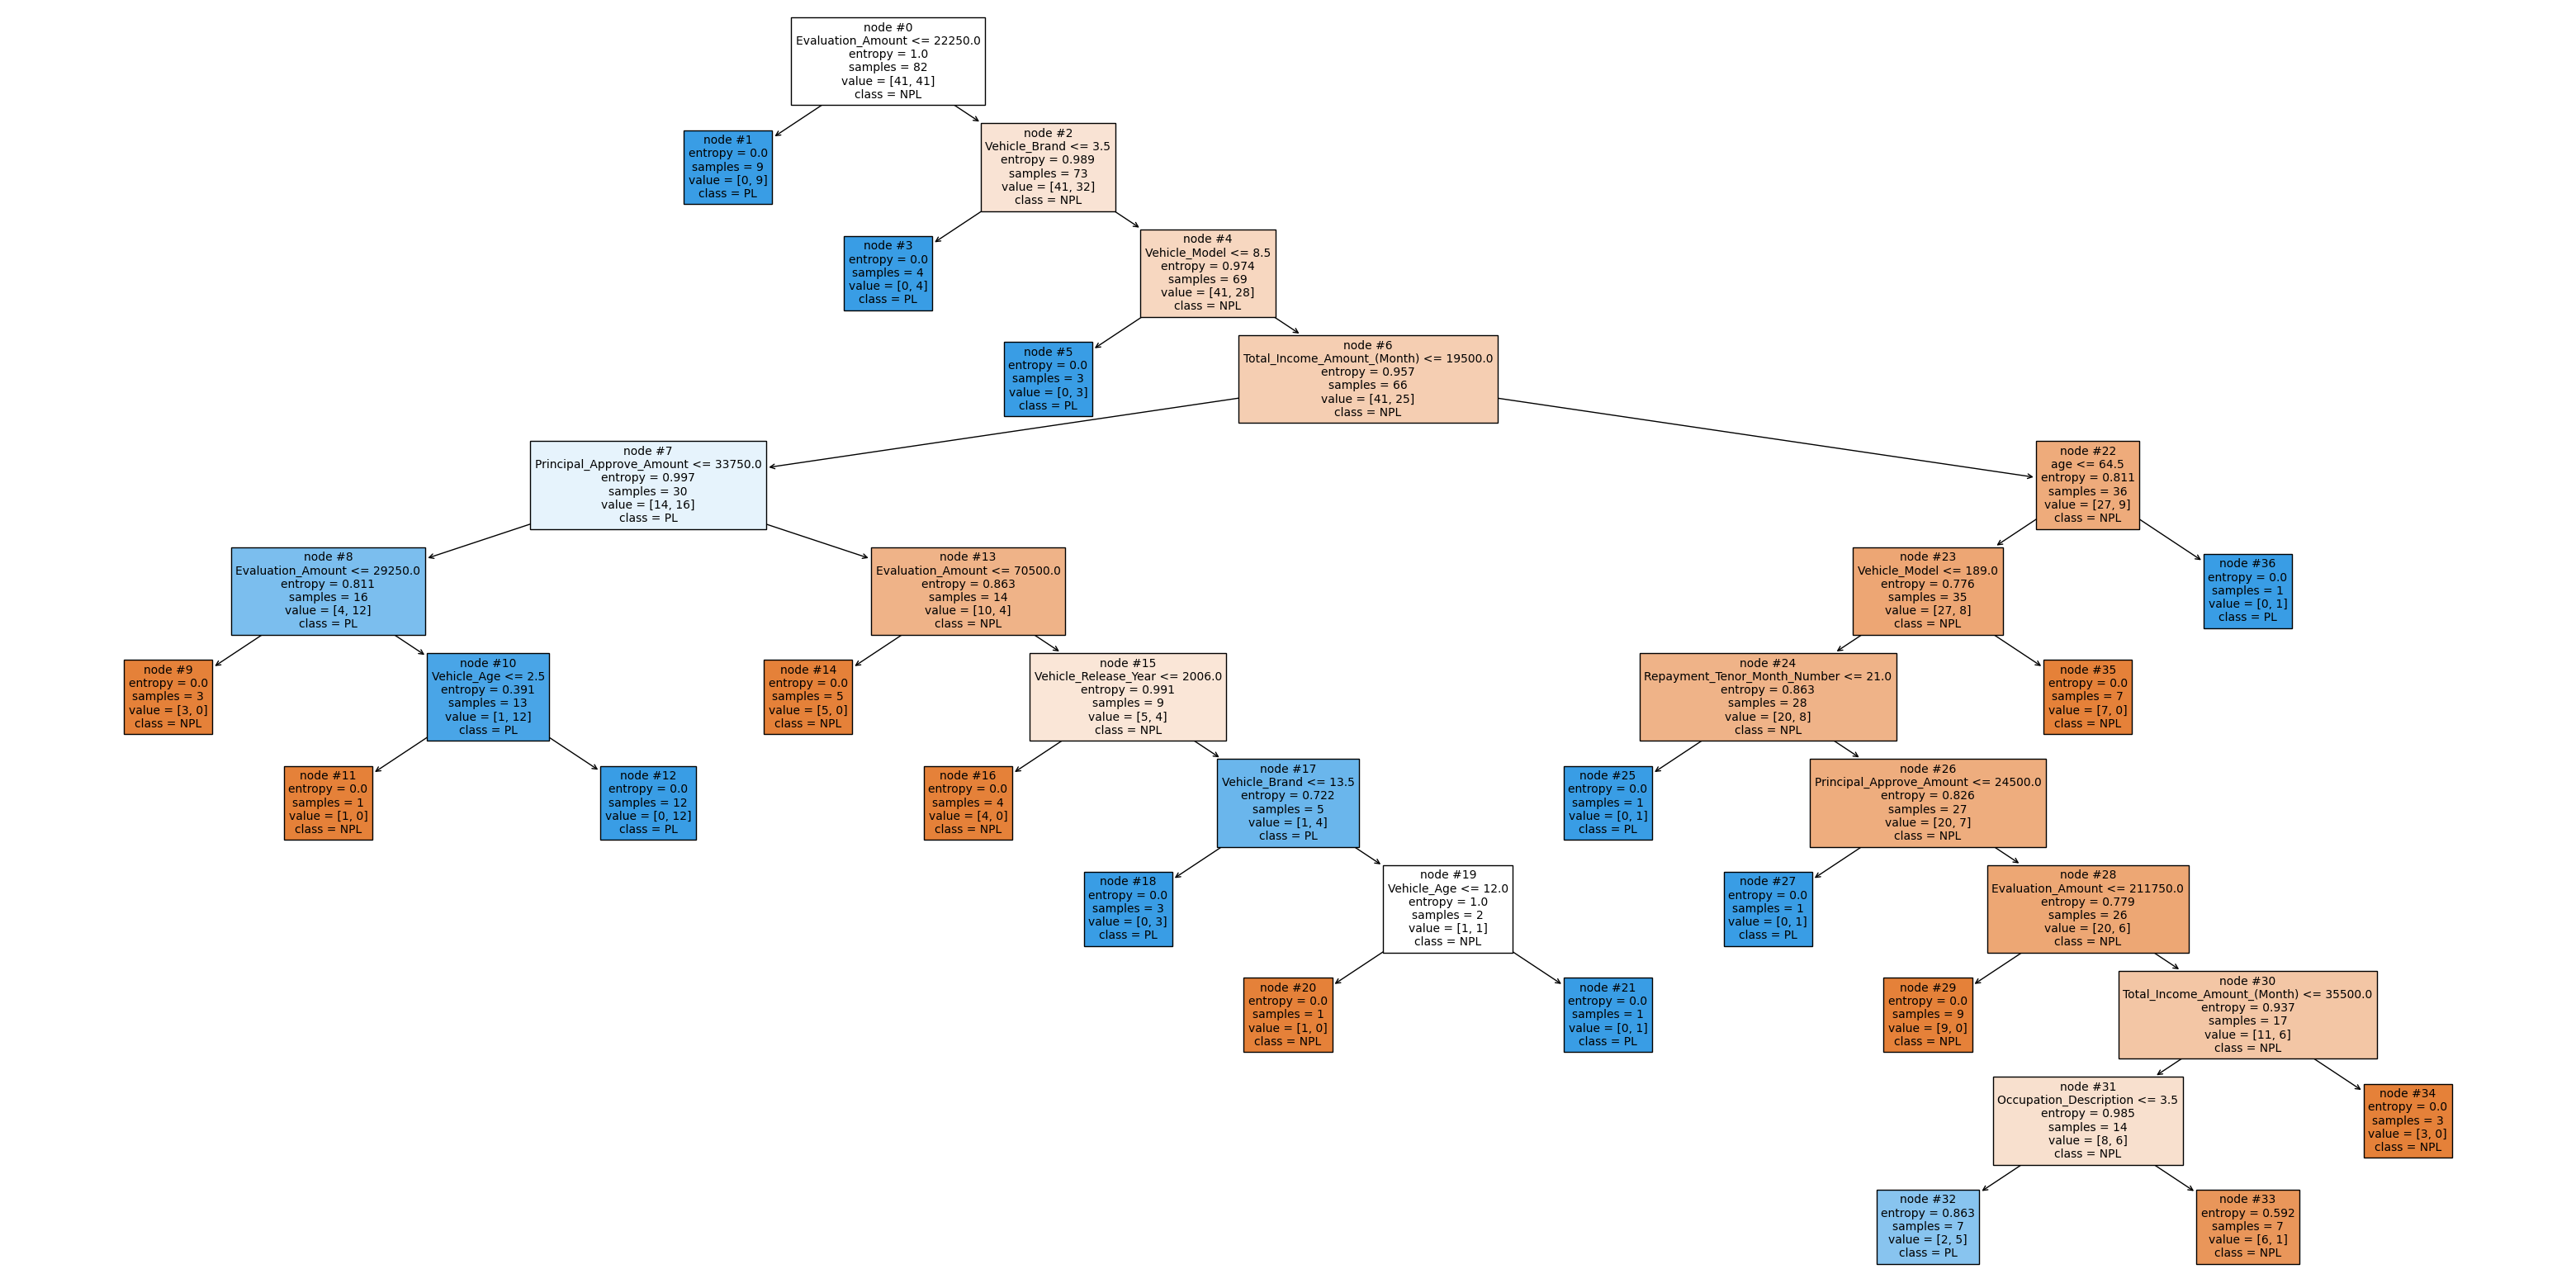

In [130]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [131]:
import graphviz

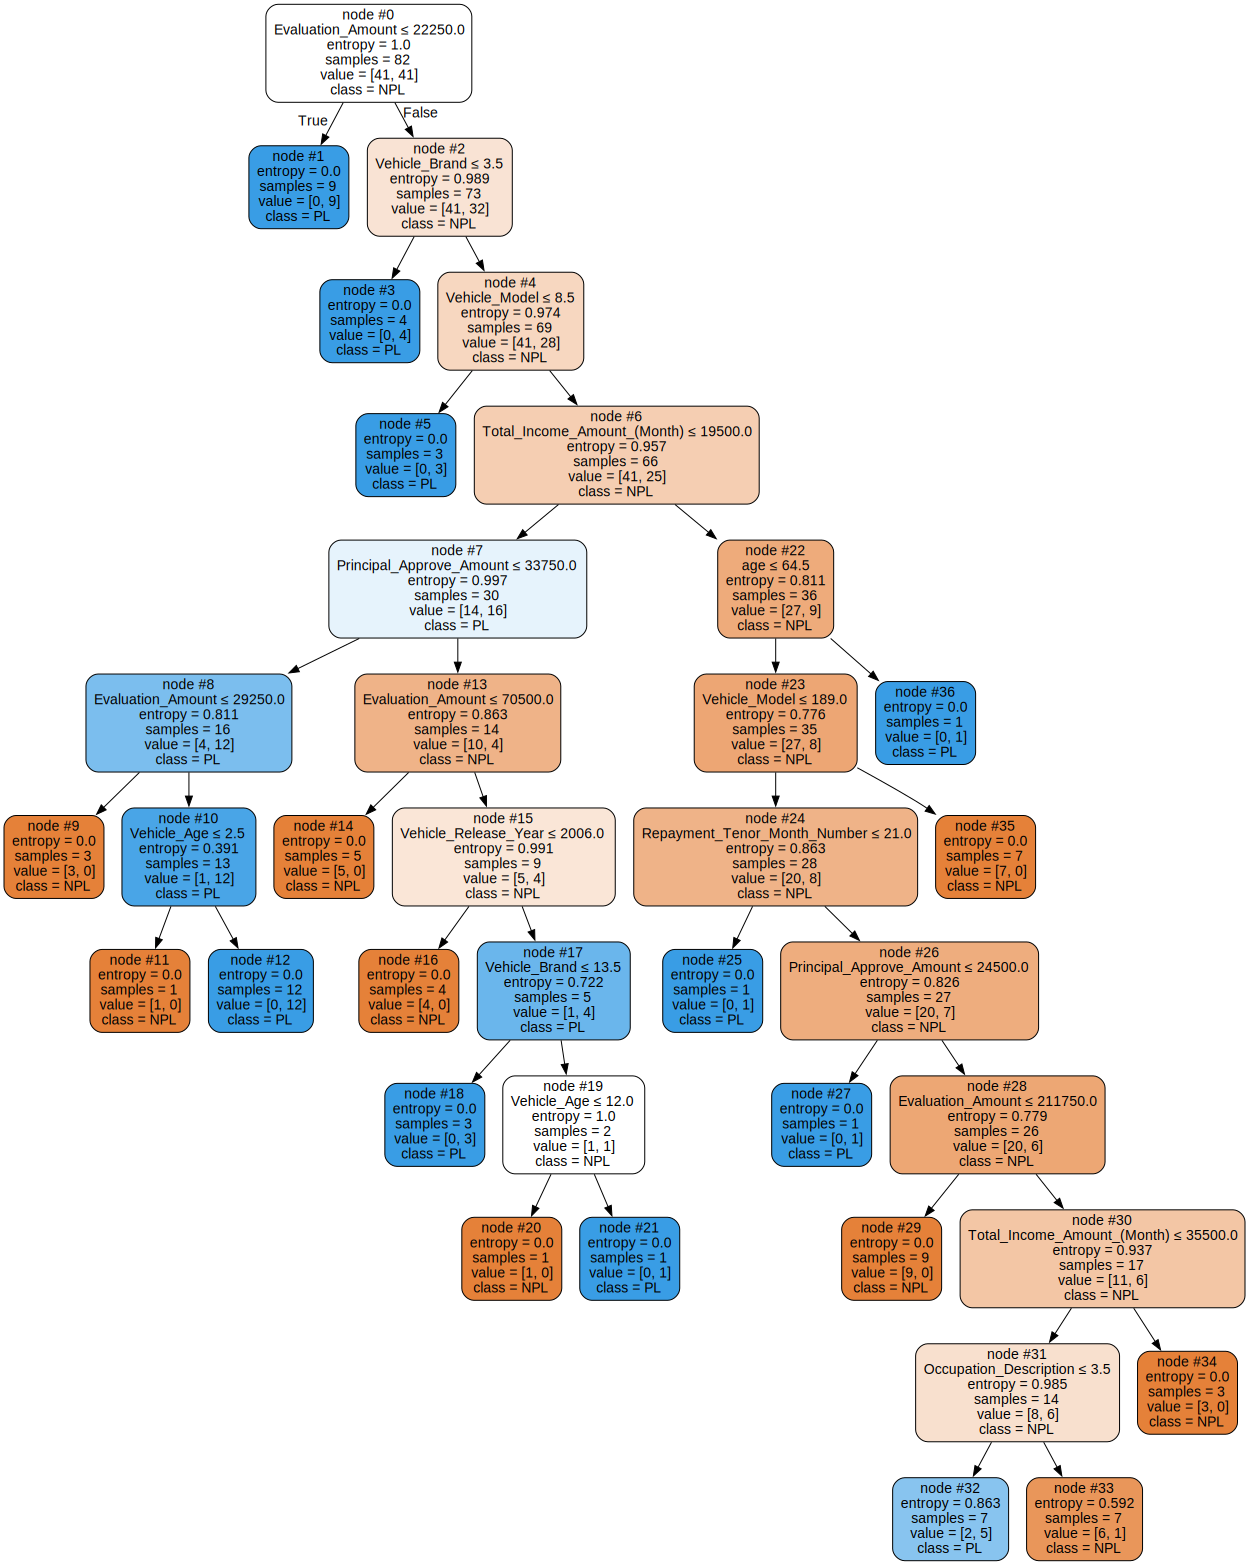

In [132]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5   9]
 [619 902]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.36      0.01      0.02       624
          PL       0.59      0.99      0.74       911

    accuracy                           0.59      1535
   macro avg       0.48      0.50      0.38      1535
weighted avg       0.50      0.59      0.45      1535



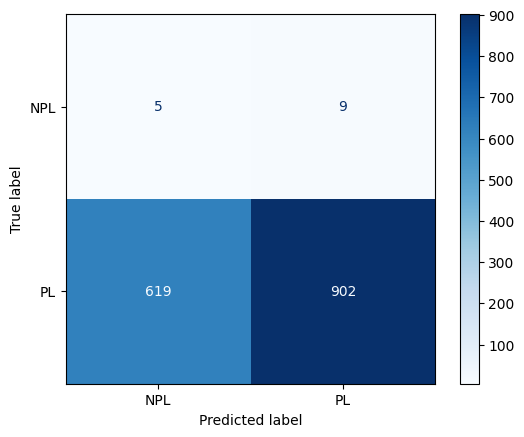

In [134]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

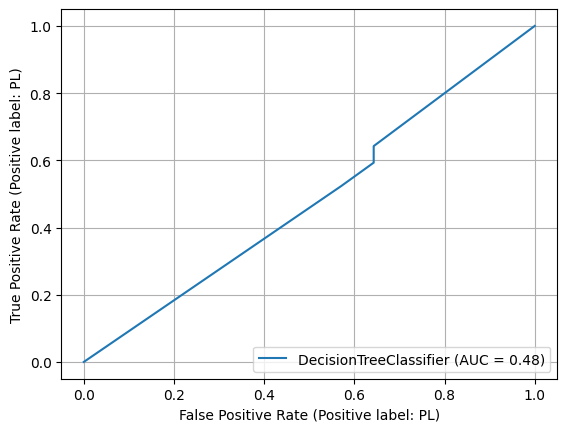

In [135]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [136]:
# กำหนดค่าพารามิเตอร์ที่ต้องการทดสอบ
max_depths = [3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
min_samples_splits = [2, 3, 4, 5]
min_samples_leaves = [1, 2, 3, 4]

best_accuracy = 0
best_parameters = {}

# ทดสอบโมเดล Decision tree ด้วยค่าพารามิเตอร์ที่ต้องการ
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(X_resampled,y_resampled)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, accuracy: {}".format(max_depth, min_samples_split, min_samples_leaf, accuracy))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters['max_depth'] = max_depth
                best_parameters['min_samples_split'] = min_samples_split
                best_parameters['min_samples_leaf'] = min_samples_leaf

# พิมพ์ค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", best_parameters)

max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 2, min_samples_leaf: 2, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 2, min_samples_leaf: 3, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 2, min_samples_leaf: 4, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 3, min_samples_leaf: 1, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 3, min_samples_leaf: 2, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 3, min_samples_leaf: 3, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 3, min_samples_leaf: 4, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 4, min_samples_leaf: 1, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 4, min_samples_leaf: 2, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 4, min_samples_leaf: 3, accuracy: 0.5947882736156351
max_depth: 3, min_samples_split: 4, min_samples_leaf: 

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy',max_depth = 11, min_samples_split = 3, min_samples_leaf = 3, random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=3, random_state=101)

In [138]:
model.feature_importances_

array([0.07236197, 0.        , 0.        , 0.        , 0.12747562,
       0.        , 0.07438546, 0.06053539, 0.0793959 , 0.48456477,
       0.05397143, 0.04730946])

In [139]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Evaluation_Amount               0.484565
Total_Income_Amount_(Month)     0.127476
Vehicle_Release_Year            0.079396
Vehicle_Brand                   0.074385
Principal_Approve_Amount        0.072362
Vehicle_Model                   0.060535
age                             0.053971
Vehicle_Age                     0.047309
Repayment_Tenor_Month_Number    0.000000
Gender                          0.000000
Occupation_Description          0.000000
Collateral_Type_Code            0.000000
dtype: float64

In [140]:
fs.sum()

0.9999999999999999

<Axes: >

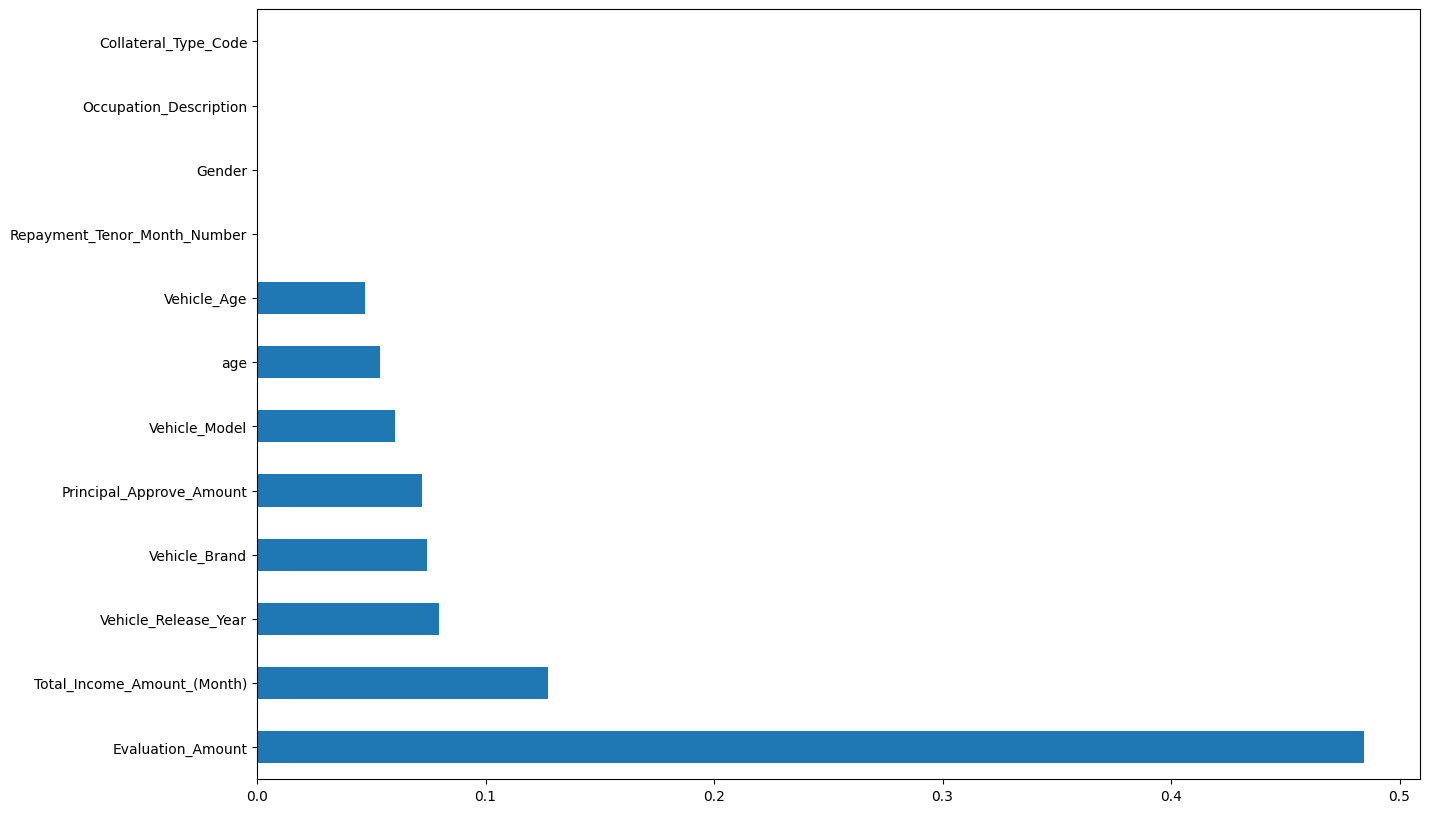

In [141]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [142]:
from sklearn.tree import DecisionTreeClassifier

#max_depth=5, min_samples_split=4, random_state=101

model = DecisionTreeClassifier(criterion='entropy',max_depth = 11, min_samples_split = 3, min_samples_leaf = 3, random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=3, random_state=101)

In [143]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 59.02280130293159
[0.97653959 0.96480938 0.97947214 0.96480938 0.97653959 0.97360704
 0.95894428 0.97067449 0.96187683 0.96187683]
Cross Validation mean is  96.891495601173
Cross Validation std is  0.6964423511459182


In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  7   7]
 [622 899]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.50      0.01      0.02       629
          PL       0.59      0.99      0.74       906

    accuracy                           0.59      1535
   macro avg       0.55      0.50      0.38      1535
weighted avg       0.55      0.59      0.45      1535



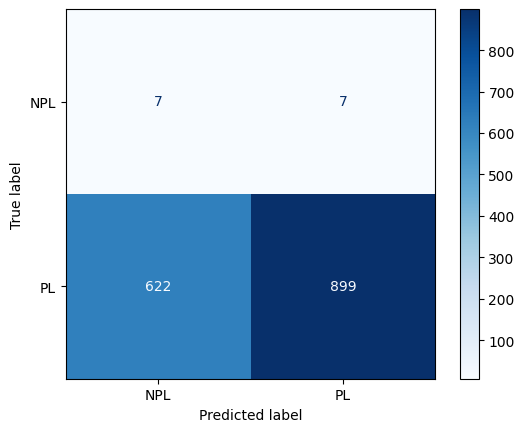

In [145]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

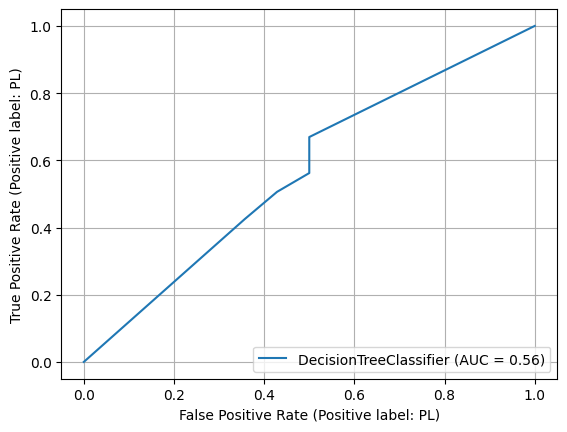

In [146]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

#### Prunning

In [147]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion='entropy',max_depth = 10, min_samples_split = 3, min_samples_leaf = 3, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 64.4299674267101
[0.97653959 0.96480938 0.97947214 0.96480938 0.97653959 0.97360704
 0.95894428 0.97067449 0.96187683 0.96187683]
Cross Validation mean is  96.891495601173
Cross Validation stdis  0.6964423511459182


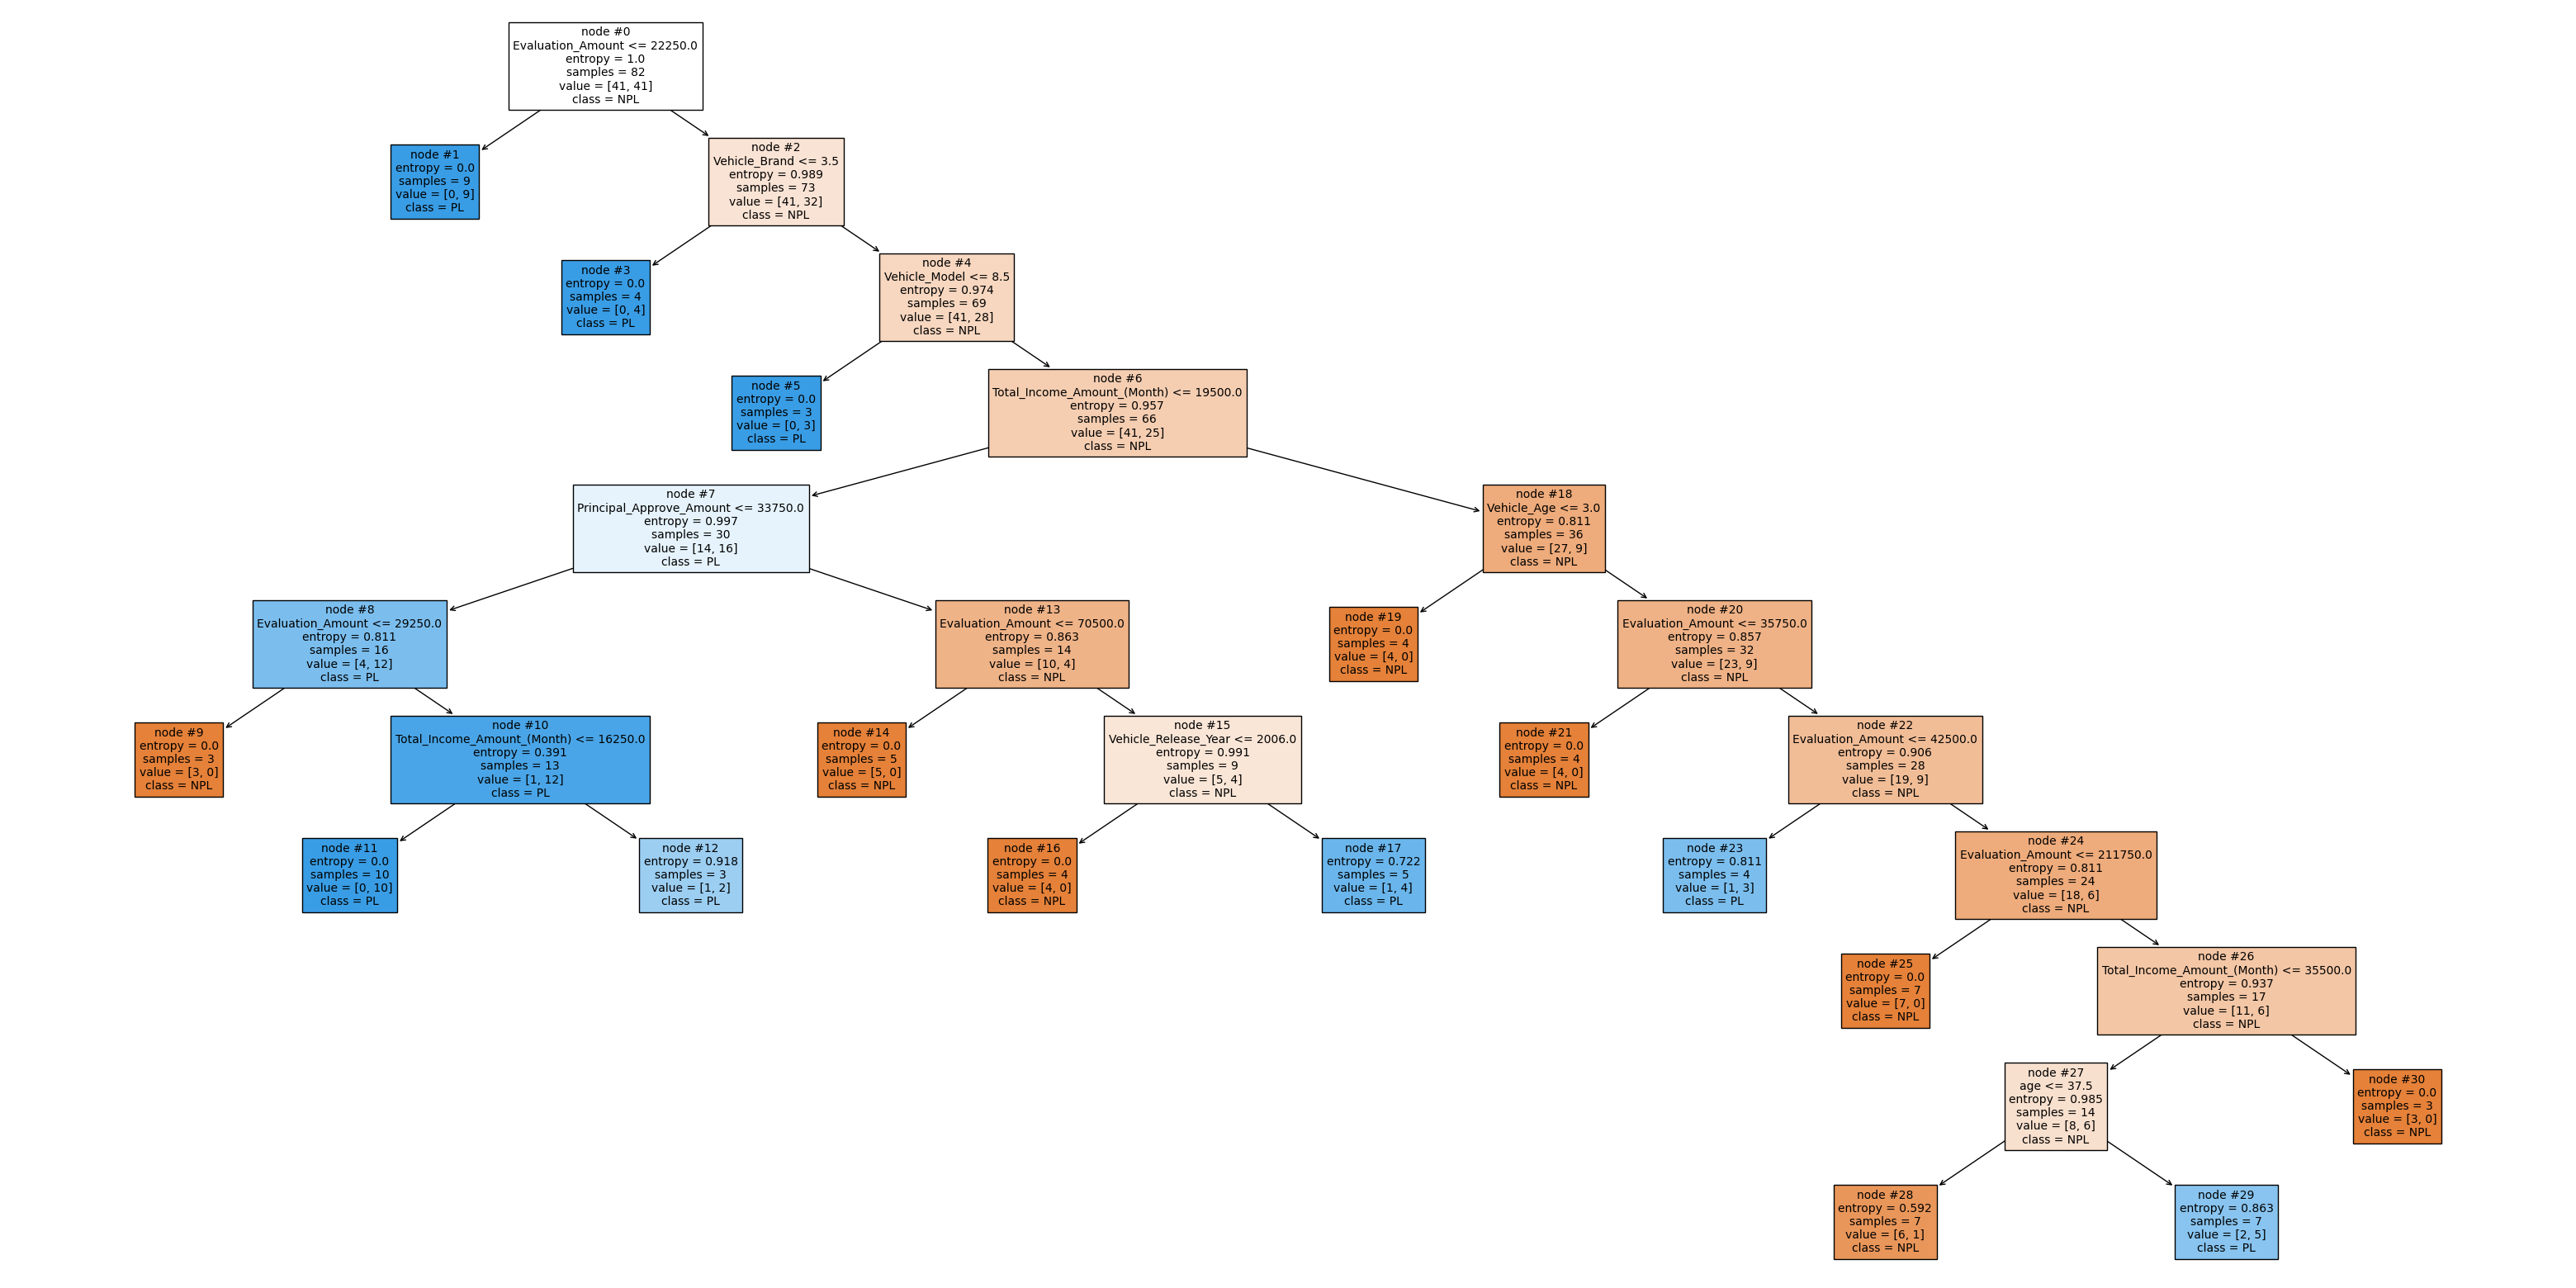

In [148]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [149]:
import graphviz

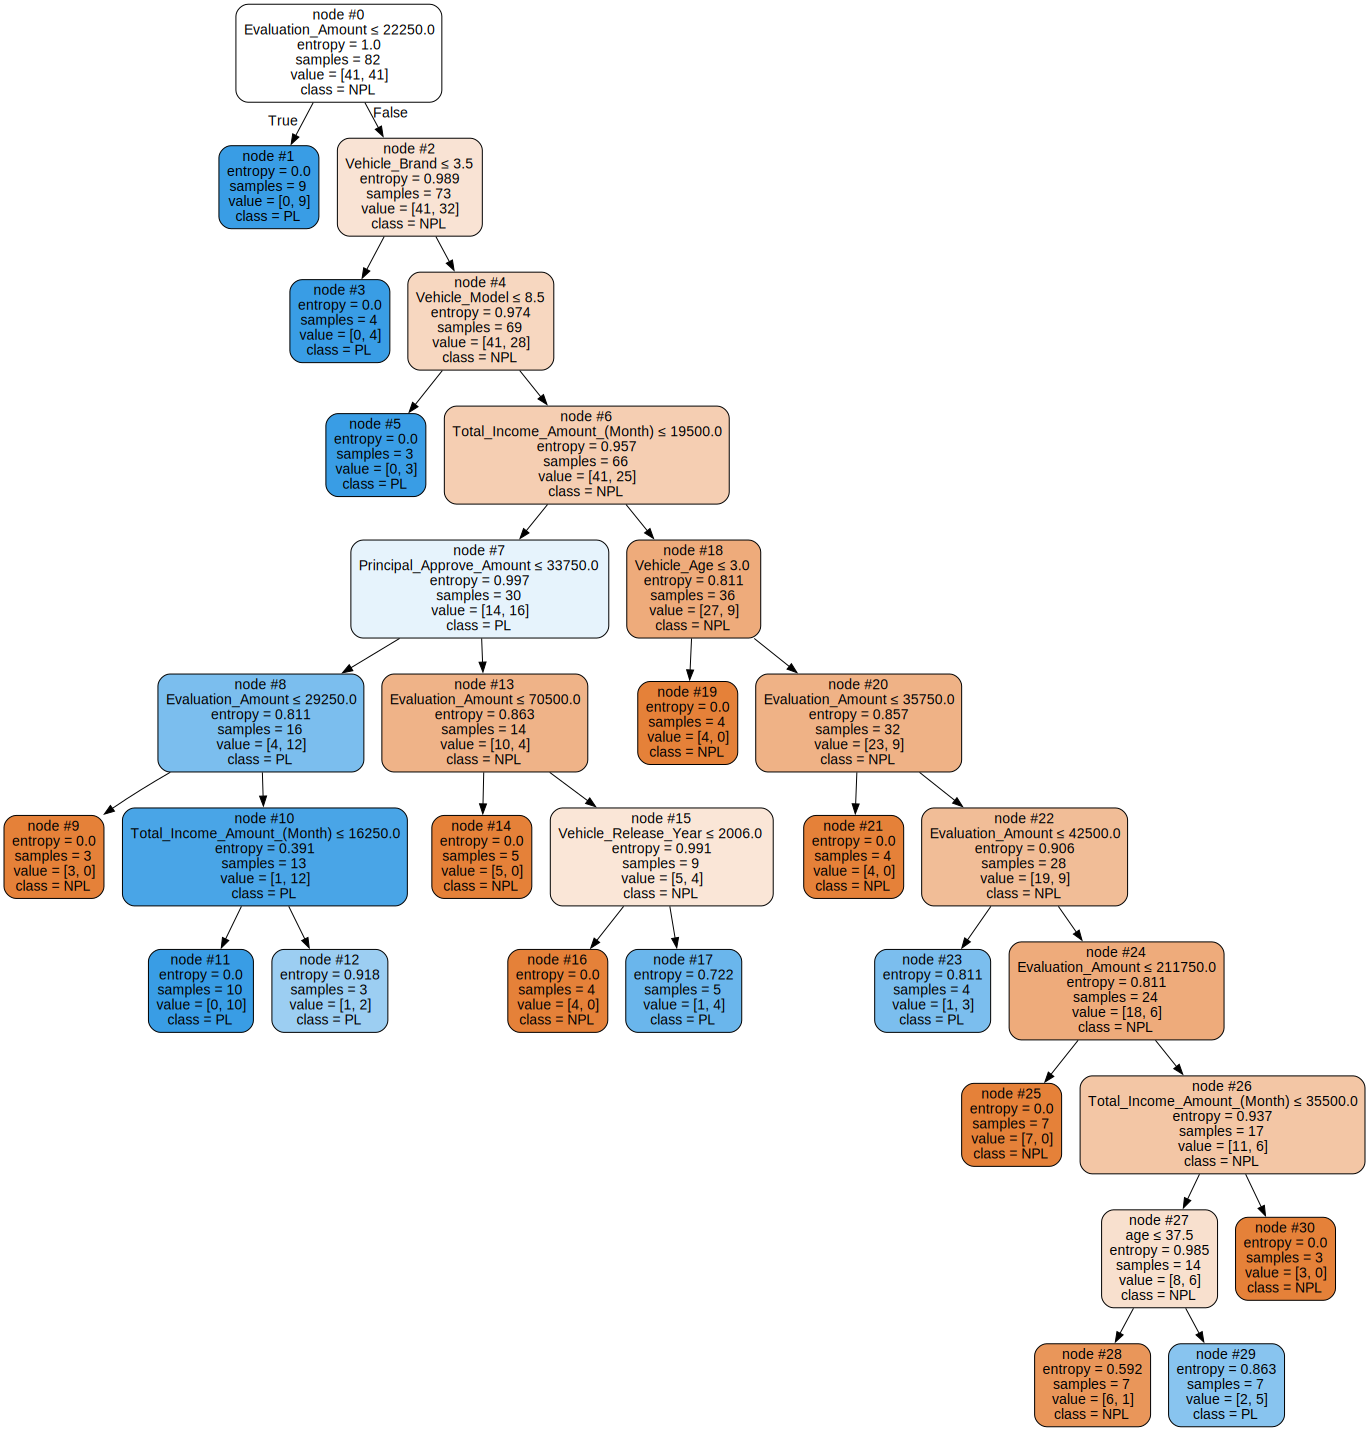

In [150]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  7   7]
 [539 982]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.50      0.01      0.03       546
          PL       0.65      0.99      0.78       989

    accuracy                           0.64      1535
   macro avg       0.57      0.50      0.40      1535
weighted avg       0.59      0.64      0.51      1535



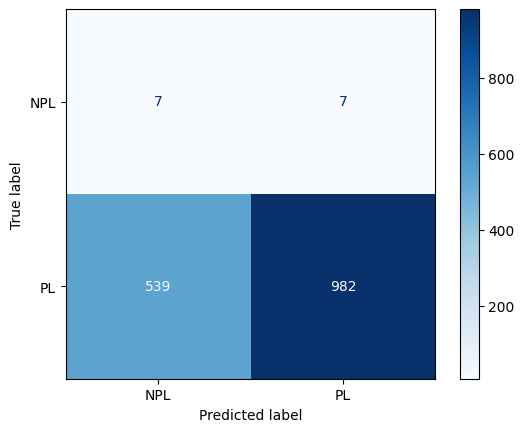

In [152]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues', values_format='d')

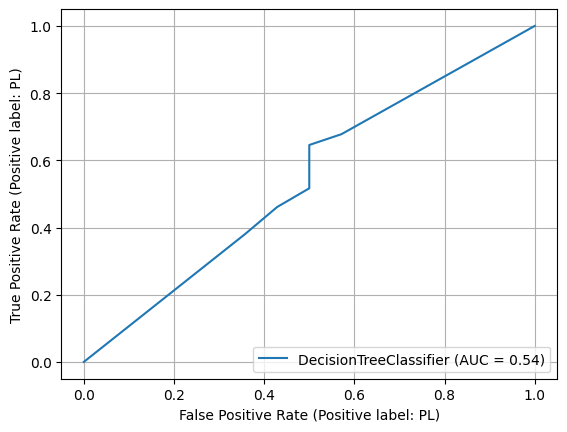

In [153]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [154]:
X_resampled.head(1)

Principal_Approve_Amount  Repayment_Tenor_Month_Number  Gender  \
4004                   21000.0                            18       0   

      Occupation_Description  Total_Income_Amount_(Month)  \
4004                       7                      15000.0   

      Collateral_Type_Code  Vehicle_Brand  Vehicle_Model  \
4004                     1              5            117   

      Vehicle_Release_Year  Evaluation_Amount  age  Vehicle_Age  
4004                  2015              28500   46            8

In [155]:
X_new = classifier.predict([[51000,36,0,10,10000,1,5,135,2018,64500,28,5]])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [156]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(n_estimators=250, random_state=101)

### Feature Importance

In [157]:
rdf_classifier.feature_importances_

array([0.14083351, 0.03857612, 0.02123658, 0.08633504, 0.11581521,
       0.02697662, 0.0499392 , 0.09771173, 0.06990873, 0.16378467,
       0.1114902 , 0.07739239])

In [158]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Evaluation_Amount               0.163785
Principal_Approve_Amount        0.140834
Total_Income_Amount_(Month)     0.115815
age                             0.111490
Vehicle_Model                   0.097712
Occupation_Description          0.086335
Vehicle_Age                     0.077392
Vehicle_Release_Year            0.069909
Vehicle_Brand                   0.049939
Repayment_Tenor_Month_Number    0.038576
Collateral_Type_Code            0.026977
Gender                          0.021237
dtype: float64

In [159]:
fs.sum()

1.0000000000000002

<Axes: >

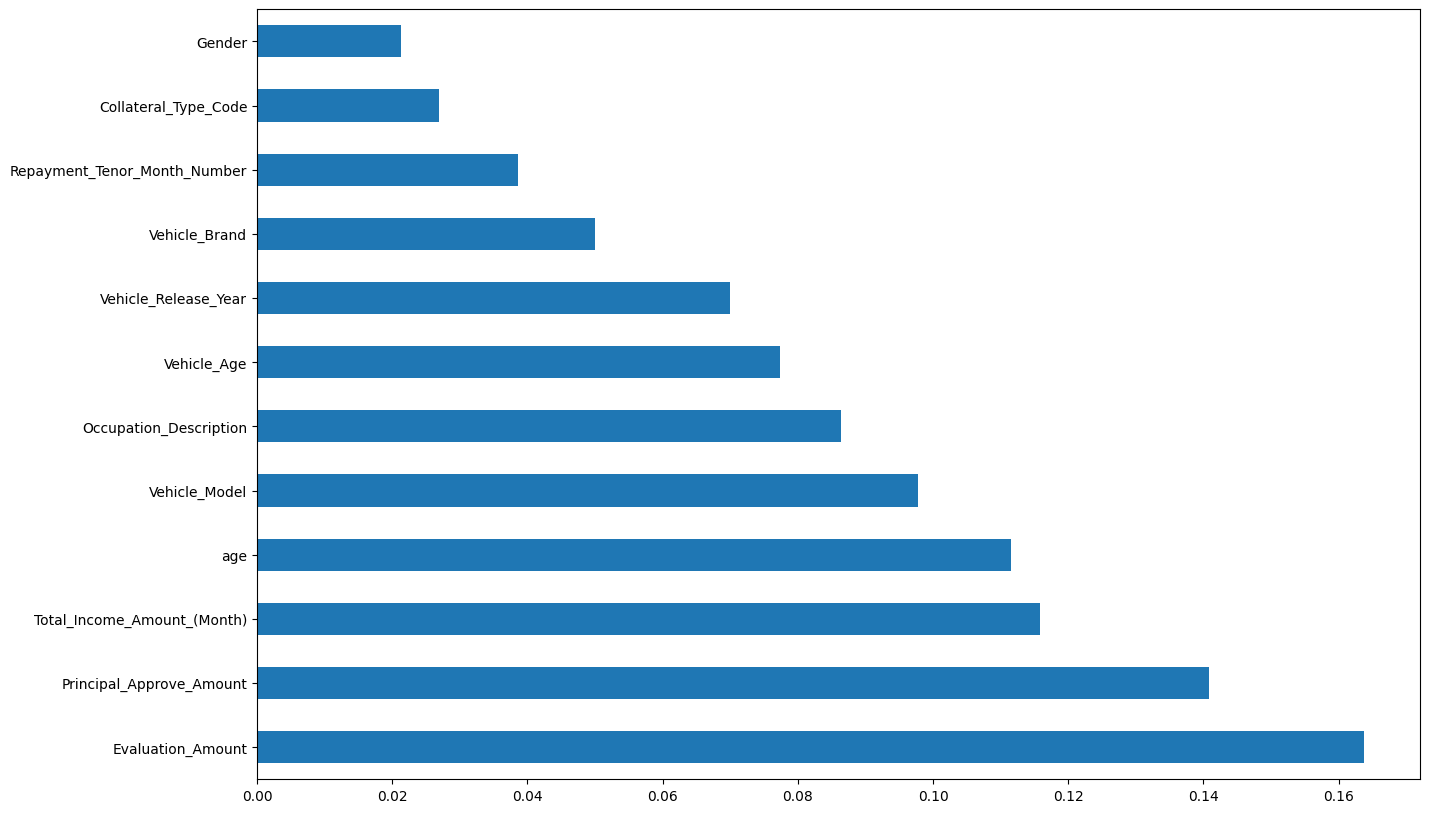

In [160]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [161]:
# #pip install shap

# import shap

In [162]:
# explainer = shap.TreeExplainer(rdf_classifier)
# shap_values = explainer.shap_values(X_resampled)

In [163]:
# choosen_instance = X_resampled.loc[[50]]
# shap_values = explainer.shap_values(choosen_instance)
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [164]:
# shap.summary_plot(shap_values, X_resampled, plot_type="bar")

In [165]:
# shap.summary_plot(shap_values, X_resampled)

In [166]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 53.355048859934854
[0.44444444 0.66666667 0.75       0.625      0.25       0.625
 0.75       0.375      0.875      0.625     ]
Cross Validation mean is  59.86111111111111
Cross Validation std is  18.006878829635777


In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 10   4]
 [712 809]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.71      0.01      0.03       722
          PL       0.53      1.00      0.69       813

    accuracy                           0.53      1535
   macro avg       0.62      0.50      0.36      1535
weighted avg       0.62      0.53      0.38      1535



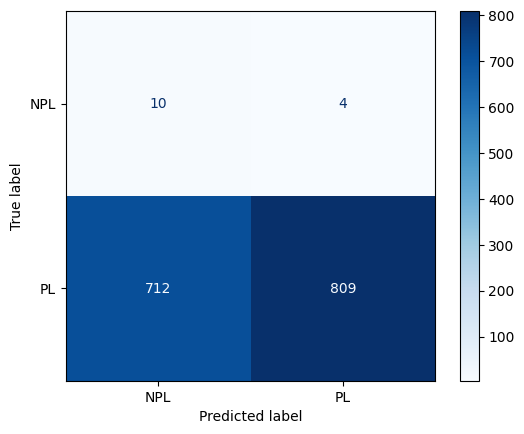

In [168]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(rdf_classifier, X_test, y_test, cmap='Blues', values_format='d')

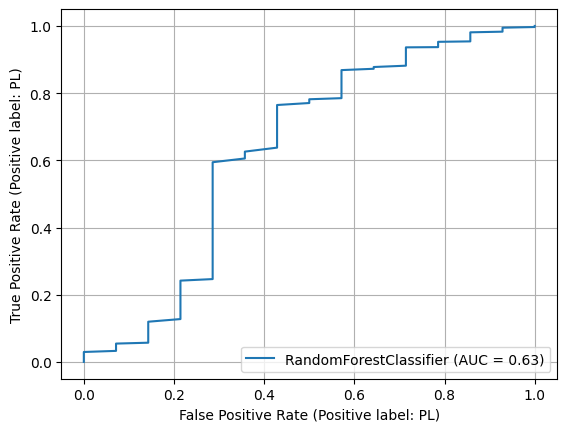

In [169]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rdf_classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [170]:
# n_estimators = [100, 200, 300]
# max_features = ['sqrt', 'log2', None]
# max_depth = [5, 10, 15]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# max_leaf_nodes = [3, 6, 9]
# criterion = ['gini', 'entropy']

# กำหนดค่า parameter ที่ต้องการปรับค่า
criterion = ['gini', 'entropy']
n_estimators = [100, 200, 300, 400]
max_depth = [None, 5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# กำหนดค่าเริ่มต้นของ parameter
best_score = 0
best_params = {}

# ลูปผ่าน parameter แต่ละตัว
for c in criterion:
    for n in n_estimators:
        for d in max_depth:
            for s in min_samples_split:
                for l in min_samples_leaf:
                    # สร้าง model และ fit ข้อมูล
                    rf = RandomForestClassifier(criterion=c, n_estimators=n, max_depth=d,
                                                min_samples_split=s, min_samples_leaf=l)
                    rf.fit(X_resampled,y_resampled)

                    # ทำนายผล validation set และคำนวณค่าความแม่นยำ
                    y_pred = rf.predict(X_test)
                    score = accuracy_score(y_test, y_pred)

                    # เลือก parameter ที่ให้ค่าความแม่นยำสูงสุด
                    if score > best_score:
                        best_score = score
                        best_params = {'criterion':c, 'n_estimators': n, 'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}

# สร้างโมเดล Random Forest ด้วย parameter ที่ดีที่สุด
rf_best = RandomForestClassifier(criterion=best_params['criterion'], n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'])
rf_best.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=9, max_features='sqrt',max_depth=10, criterion=entropy

# model = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=101)
model = RandomForestClassifier(min_samples_split=10, min_samples_leaf=4, 
                               max_depth=10, random_state=101)

rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=101)

#### Feature Importance

In [172]:
rdf_classifier.feature_importances_

array([0.16683655, 0.0489562 , 0.01845436, 0.06458075, 0.12836678,
       0.02043141, 0.03940632, 0.09658774, 0.05648602, 0.15839566,
       0.14472394, 0.05677427])

In [173]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Principal_Approve_Amount        0.166837
Evaluation_Amount               0.158396
age                             0.144724
Total_Income_Amount_(Month)     0.128367
Vehicle_Model                   0.096588
Occupation_Description          0.064581
Vehicle_Age                     0.056774
Vehicle_Release_Year            0.056486
Repayment_Tenor_Month_Number    0.048956
Vehicle_Brand                   0.039406
Collateral_Type_Code            0.020431
Gender                          0.018454
dtype: float64

In [174]:
fs.sum()

1.0

<Axes: >

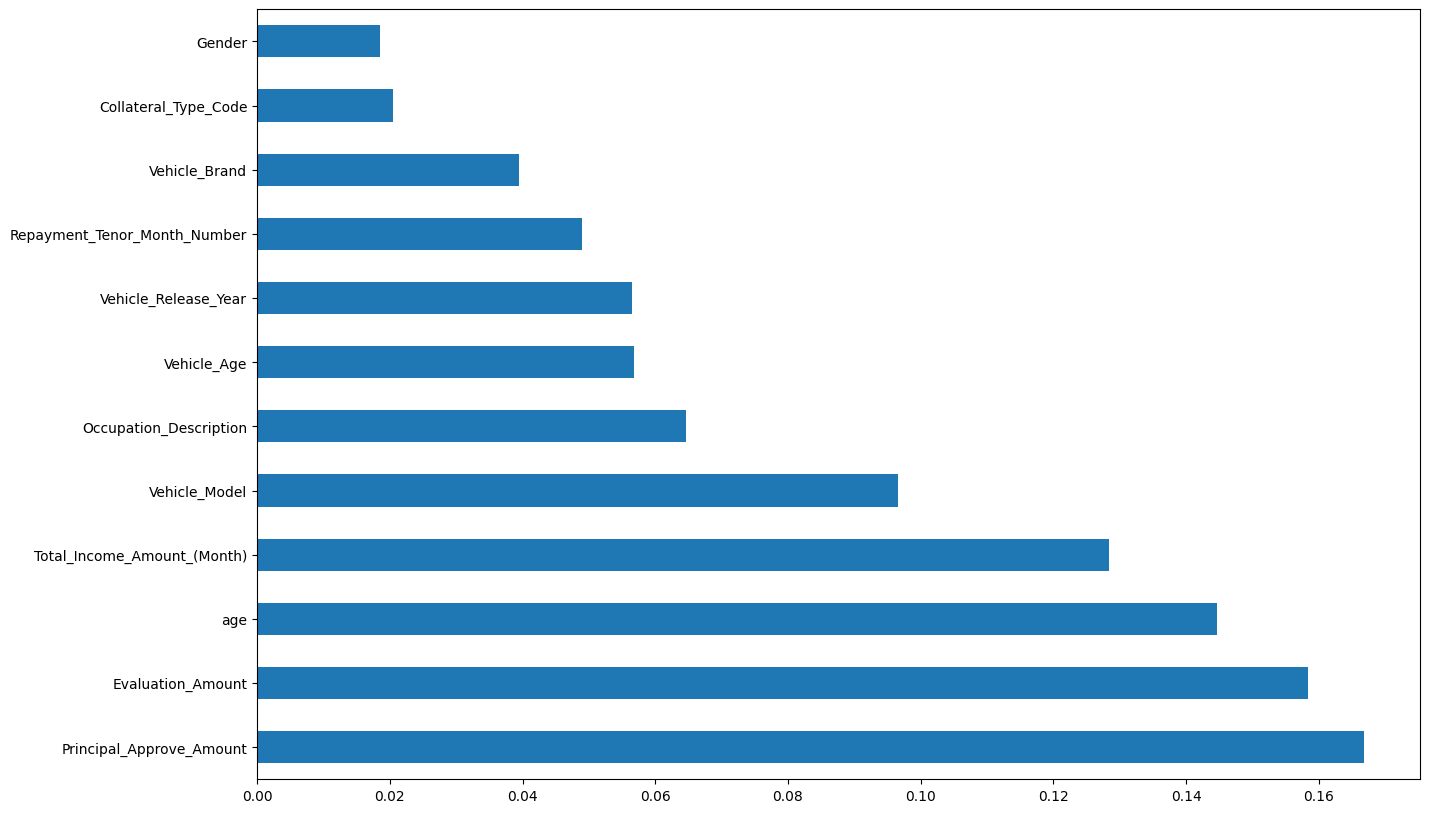

In [175]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [176]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 55.11400651465797
[0.55555556 0.66666667 0.75       0.875      0.375      0.625
 0.875      0.375      0.625      0.5       ]
Cross Validation mean is  62.22222222222222
Cross Validation std is  16.962649600857805


In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 10   4]
 [685 836]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.71      0.01      0.03       695
          PL       0.55      1.00      0.71       840

    accuracy                           0.55      1535
   macro avg       0.63      0.50      0.37      1535
weighted avg       0.62      0.55      0.40      1535



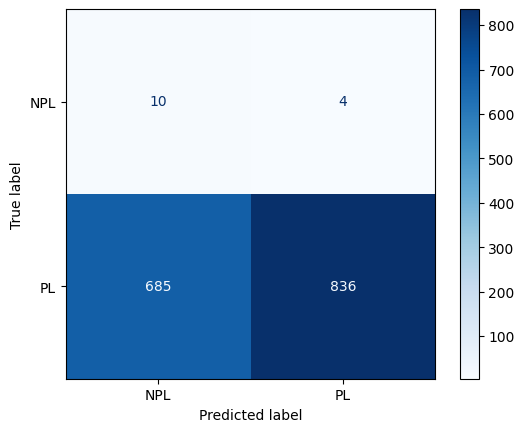

In [178]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d')

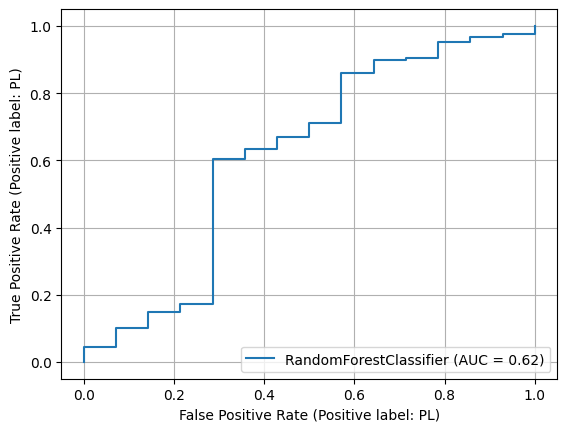

In [179]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.grid()

### Export Model to Streamlit

In [180]:
import pickle

In [181]:
pickle_out = open("RandomForest.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- GridSearchCV

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

In [183]:
# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=101)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

In [184]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [3, 6, 9],
    'criterion':['gini', 'entropy']
}

In [185]:
# Instantiate a random forest classifier
rf = RandomForestClassifier(random_state=101)

In [186]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300,
                       random_state=101)


In [187]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_*100)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.2f}%".format(accuracy*100))
print("F1 score: {:.2f}".format(f1))

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score:  71.46031746031747
Accuracy: 52.44%
F1 score: 0.36


In [188]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

criterion  max_depth max_features  max_leaf_nodes  min_samples_leaf  \
0      gini          5         sqrt               3                 1   
1      gini          5         sqrt               3                 1   
2      gini          5         sqrt               3                 1   
3      gini          5         sqrt               3                 1   
4      gini          5         sqrt               3                 1   

   min_samples_split  n_estimators  Accuracy  
0                  2           100  0.661681  
1                  2           200  0.660014  
2                  2           300  0.660014  
3                  5           100  0.661681  
4                  5           200  0.660014

In [190]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean(numeric_only=True)
grid_contour

max_depth  max_leaf_nodes  min_samples_leaf  \
max_features n_estimators                                                
log2         100                10.0             6.0          2.333333   
             200                10.0             6.0          2.333333   
             300                10.0             6.0          2.333333   
sqrt         100                10.0             6.0          2.333333   
             200                10.0             6.0          2.333333   
             300                10.0             6.0          2.333333   

                           min_samples_split  Accuracy  
max_features n_estimators                               
log2         100                    5.666667  0.635651  
             200                    5.666667  0.646089  
             300                    5.666667  0.666029  
sqrt         100                    5.666667  0.635651  
             200                    5.666667  0.646089  
             300                    5.666667  0.666029

In [192]:
# grid_reset = grid_contour.reset_index()
# grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
# grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
# grid_pivot

In [193]:
model_grid = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=101)
model_grid.fit(X_resampled, y_resampled)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

         NPL       0.71      0.01      0.03       695
          PL       0.55      1.00      0.71       840

    accuracy                           0.55      1535
   macro avg       0.63      0.50      0.37      1535
weighted avg       0.62      0.55      0.40      1535



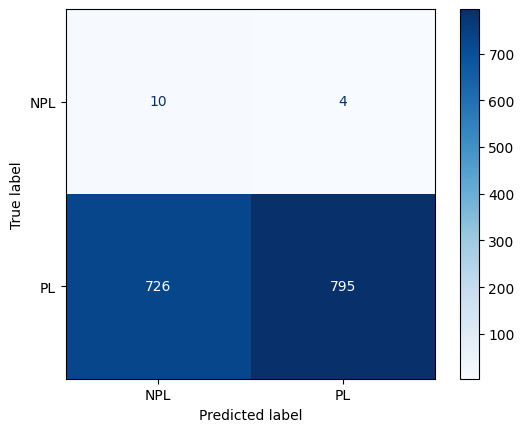

In [194]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(model_grid, X_test, y_test, cmap='Blues', values_format='d')

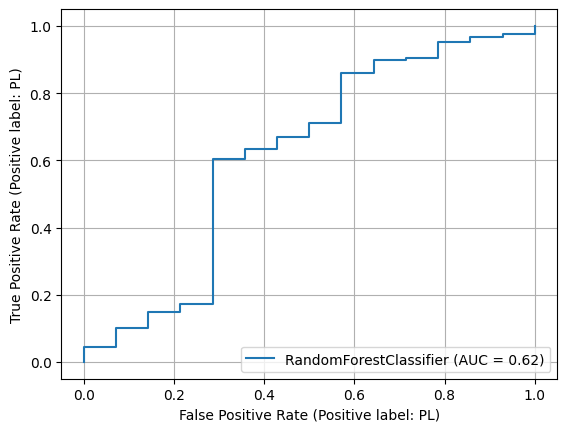

In [196]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rdf_classifier, X_test, y_test)
plt.grid()

### Export Model with Hypertuning GrifSearchCV

In [197]:
import pickle

In [198]:
pickle_out = open("RandomForest-GridSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- RandomizedSearchCV

In [199]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_resampled, y_resampled)
print(random_search.best_estimator_)
print("Accuracy: {:.2f}%".format(accuracy*100))

RandomForestClassifier(max_depth=5, max_features=None, max_leaf_nodes=9,
                       min_samples_split=10)
Accuracy: 52.44%


In [201]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_*100)

model_random = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=9, n_estimators=200, random_state=101)
model_random.fit(X_resampled, y_resampled)
y_pred_rand = model.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy*100))
print(classification_report(y_pred_rand, y_test))

Best parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 9, 'max_features': None, 'max_depth': 5, 'criterion': 'gini'}
Best score:  68.16176470588235
Accuracy: 52.44%
              precision    recall  f1-score   support

         NPL       0.71      0.01      0.03       695
          PL       0.55      1.00      0.71       840

    accuracy                           0.55      1535
   macro avg       0.63      0.50      0.37      1535
weighted avg       0.62      0.55      0.40      1535



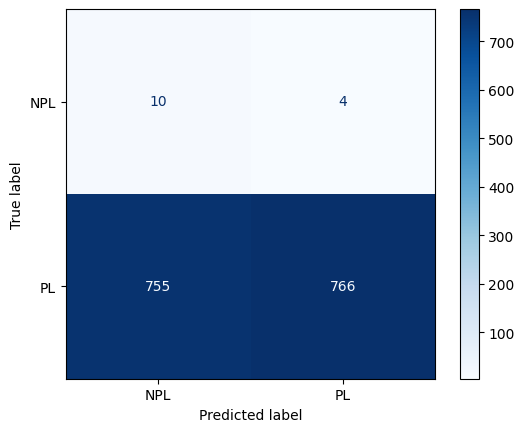

In [202]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , RocCurveDisplay
ConfusionMatrixDisplay.from_estimator(model_random, X_test, y_test, cmap='Blues', values_format='d')

### Export Model with Hypertuning RandomizedSearchCV

In [203]:
pickle_out = open("RandomForest-RandomizedSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Voting classifier Model

In [205]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [206]:
# สร้างโมเดลต่าง ๆ ที่จะนำมาใช้ใน Voting Classifier
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=101)
tree = DecisionTreeClassifier(random_state=101)

# กำหนด Voting Classifier โดยให้ใช้โมเดลทั้ง 3 โมเดลที่สร้างขึ้นมาก่อนหน้านี้

In [232]:
# กำหนด Voting Classifier โดยให้ใช้โมเดลทั้ง 3 โมเดลที่สร้างขึ้นมาก่อนหน้านี้
voting_clf = VotingClassifier(
    estimators=[('rf', rdf_classifier), ('tree', classifier), ('lr', lr), ('svm', svm)],
    voting='hard' # กำหนดว่าจะให้ใช้การ Vote ด้วยการนับจำนวนโมเดลที่ทำนายถูกมากกว่า (hard)
)

In [233]:
# # สร้างข้อมูลตัวอย่าง
# X = [[0, 0], [1, 1]]
# y = [0, 1]

X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

In [234]:
# สอนโมเดล
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     random_state=101)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=3,
                                                     random_state=101)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svm', SVC(random_state=42))])

In [235]:
predictions = voting_clf.predict(X_test)

In [236]:
# # ทดสอบโมเดล
# print(voting_clf.predict([[2., 2.], [-1, -2]]))

print(predictions)

['PL' 'PL' 'PL' ... 'PL' 'PL' 'PL']


# Voting Classifier with soft voting

In [237]:
vot_soft = VotingClassifier(estimators=[('rf', rdf_classifier), ('tree', classifier)] , voting='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)

score1 = accuracy_score(y_test, y_pred)
print("Soft Voting Score %d" %score1)


Soft Voting Score 0


In [239]:
from sklearn.model_selection import cross_val_score

c=[]
c.append(cross_val_score(rdf_classifier, X_train, y_train, cv=10, scoring='accuracy').mean())
c.append(cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy').mean())
print(c)

[0.9781346000682671, 0.9648025941517806]
